# **World's Top Universities and their Rankings📊**

#  Data Visualization Solution for Angel Hack

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams['axes.edgecolor']='#FA6E4F'
plt.rcParams['font.family'] = 'monospace'
import seaborn as sns
import geopandas as gpd
import missingno as msno
import re
import plotly.express as px

# matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/the-world-university-rankings-2011-2023/2017_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2020_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2023_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2015_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2018_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2022_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2012_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2013_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2014_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2016_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2021_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2011_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2019_rankings.csv


In [2]:
long_palette = ["#FA6E4F", "#F2CF59", "#FB8E7E", "#C5D7C0", "#8EC9BB", "#F8CA9D", '#F69EAF', '#8F8CBC', '#7C5396', '#EA6382', '#6BEAF3', '#5A9DE2', '#DDAD64', '#EA876B', '#B98174', '#357866', '#625586', '#647B99']
custom_palette1 = sns.color_palette(long_palette)

short_palette = ["#FA6E4F", "#F2CF59", "#FB8E7E", "#C5D7C0", "#8EC9BB", "#F8CA9D"]
custom_palette2 = sns.color_palette(short_palette)

watermelon_colors = ['#84e3c8', '#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5', '#ff8b94', '#ff7480']
custom_palette3 = sns.color_palette(watermelon_colors)

research_palette = ['#FA6E4F','#8EC9BB']

student_faculty_palette = ['#003f5c','#ff6361']

international_palette = ['#ffcf6a','#628d82']

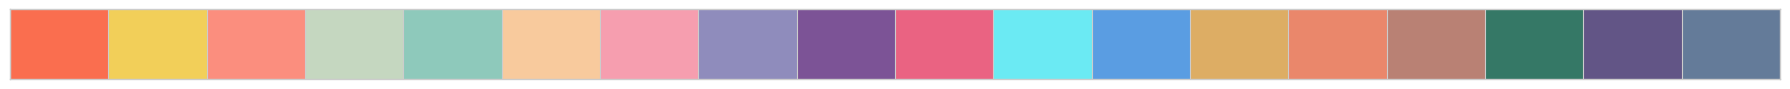

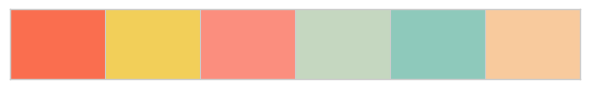

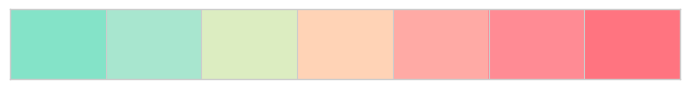

In [3]:
sns.palplot(sns.color_palette(long_palette))
sns.palplot(sns.color_palette(short_palette))
sns.palplot(sns.color_palette(watermelon_colors))

Data Preprocessing and Cleaning

In [4]:
def replace_eq(string):
    string = str(string)
    if isinstance(string,int):
        return string
    elif '=' in string:
        # print(string)
        val = string.replace('=','')
        # print(val)
        return val
    elif '-' in string:
        val = string.split('-')[0]
        return val
    elif '—' in string:
        val = string.split('-')[1]
        return val
    elif '+' in string:
        val = string.split('+')[0]
        return val
    elif 'Reporter' in string:
        return 100
    else:
        return string

Load Data

In [5]:
df_lst = []
for dirname, _, filenames in os.walk('/kaggle/input/the-world-university-rankings-2011-2023/'):
    filenames = ['2019_rankings.csv','2020_rankings.csv','2021_rankings.csv',
            '2022_rankings.csv','2023_rankings.csv'] # '2018_rankings.csv',
    print(filename)
    for filename in filenames:
        print(filename)
        temp_df = pd.read_csv(os.path.join(dirname, filename))
        temp_df.rename(columns={'name': 'university_name', 'rank': 'world_rank', 'location':'country',
                               'scores_overall':'total_score','stats_number_students':'num_students',
                               'stats_student_staff_ratio':'student_staff_ratio',
                                'stats_pc_intl_students':'international_students'
                               }, inplace=True)
        temp_df['total_score'] = pd.to_numeric(temp_df['total_score'], errors='coerce')
        temp_df['world_rank'] = temp_df['world_rank'].astype(str)
        temp_df['world_rank'] = temp_df['world_rank'].apply(lambda x:replace_eq(str(x)))

        temp_df['world_rank'] = pd.to_numeric(temp_df['world_rank'], errors='coerce')
        temp_df['year'] = int(filename.split('_')[0])

        df_lst.append(temp_df)

2019_rankings.csv
2019_rankings.csv
2020_rankings.csv
2021_rankings.csv
2022_rankings.csv
2023_rankings.csv


In [6]:
df = pd.concat(df_lst, ignore_index=True)

In [7]:
df.head()

rank_order  world_rank                        university_name  total_score  \
0          10         1.0                   University of Oxford         96.0   
1          20         2.0                University of Cambridge         94.8   
2          30         3.0                    Stanford University         94.7   
3          40         4.0  Massachusetts Institute of Technology         94.2   
4          50         5.0     California Institute of Technology         94.1   

   scores_overall_rank  scores_teaching  scores_teaching_rank  \
0                   10             91.8                     5   
1                   20             92.1                     3   
2                   30             93.6                     2   
3                   40             91.9                     4   
4                   50             94.5                     1   

   scores_research  scores_research_rank  scores_citations  ...  \
0             99.5                     1              99.1  ...   
1             98.8                     2              97.1  ...   
2             96.8                     5              99.9  ...   
3             92.7                     9              99.9  ...   
4             97.2                     4              99.2  ...   

          country  num_students  student_staff_ratio  international_students  \
0  United Kingdom        20,300                 11.0                     40%   
1  United Kingdom        18,750                 10.9                     37%   
2   United States        15,878                  7.4                     23%   
3   United States        11,231                  8.7                     34%   
4   United States         2,255                  6.5                     29%   

   stats_female_male_ratio                                     aliases  \
0                  46 : 54                        University of Oxford   
1                  46 : 54                     University of Cambridge   
2                  43 : 57                         Stanford University   
3                  38 : 62       Massachusetts Institute of Technology   
4                  33 : 67  California Institute of Technology caltech   

                                    subjects_offered  closed unaccredited  \
0  Accounting & Finance,General Engineering,Commu...   False        False   
1  Business & Management,General Engineering,Art,...   False        False   
2  Physics & Astronomy,Computer Science,Politics ...   False        False   
3  Mathematics & Statistics,Languages, Literature...   False        False   
4  Languages, Literature & Linguistics,Economics ...   False        False   

   year  
0  2019  
1  2019  
2  2019  
3  2019  
4  2019  

[5 rows x 25 columns]

In [8]:
df.tail()

rank_order  world_rank                        university_name  \
8633     1000523       100.0                York St John University   
8634     1000524       100.0    Yusuf Maitama Sule University, Kano   
8635     1000525       100.0  Zhytomyr Polytechnic State University   
8636     1000526       100.0                    Ziauddin University   
8637     1000544       100.0                       Zarqa University   

      total_score  scores_overall_rank  scores_teaching  scores_teaching_rank  \
8633          NaN              1000523              NaN                     0   
8634          NaN              1000524              NaN                     0   
8635          NaN              1000525              NaN                     0   
8636          NaN              1000526              NaN                     0   
8637          NaN              1000544              NaN                     0   

      scores_research  scores_research_rank  scores_citations  ...  \
8633              NaN                     0               NaN  ...   
8634              NaN                     0               NaN  ...   
8635              NaN                     0               NaN  ...   
8636              NaN                     0               NaN  ...   
8637              NaN                     0               NaN  ...   

             country  num_students  student_staff_ratio  \
8633  United Kingdom         6,315                 18.6   
8634         Nigeria        12,880                 33.0   
8635         Ukraine         3,869                 15.4   
8636        Pakistan         4,906                  8.8   
8637          Jordan         5,768                 18.1   

      international_students  stats_female_male_ratio  \
8633                     12%                  65 : 35   
8634                      0%                  48 : 52   
8635                      1%                  34 : 66   
8636                      1%                  63 : 37   
8637                     32%                  47 : 53   

                                    aliases  \
8633                York St John University   
8634    Yusuf Maitama Sule University, Kano   
8635  Zhytomyr Polytechnic State University   
8636                    Ziauddin University   
8637                       Zarqa University   

                                       subjects_offered  closed unaccredited  \
8633  Biological Sciences,General Engineering,Geogra...   False        False   
8634  Computer Science,Education,Politics & Internat...   False        False   
8635  Economics & Econometrics,Computer Science,Acco...   False        False   
8636  Business & Management,Biological Sciences,Medi...   False        False   
8637  Economics & Econometrics,Art, Performing Arts ...   False        False   

      year  
8633  2023  
8634  2023  
8635  2023  
8636  2023  
8637  2023  

[5 rows x 25 columns]

In [9]:
df.describe()

rank_order   world_rank  total_score  scores_overall_rank  \
count  8.638000e+03  3931.000000  1005.000000         8.638000e+03   
mean   1.222031e+05   602.840244    65.939701         1.222031e+05   
std    3.170352e+05   527.743392    11.064662         3.170352e+05   
min    1.000000e+01     1.000000    53.100000         1.000000e+01   
25%    4.322500e+03   100.000000    57.400000         4.322500e+03   
50%    8.640000e+03   194.000000    62.300000         8.640000e+03   
75%    1.305750e+04  1001.000000    71.400000         1.305750e+04   
max    1.000544e+06  1501.000000    96.400000         1.000544e+06   

       scores_teaching  scores_teaching_rank  scores_research  \
count      7642.000000           8638.000000      7642.000000   
mean         27.764342            687.030331        23.522115   
std          13.781597            499.703482        17.177035   
min           9.200000              0.000000         6.600000   
25%          18.300000            233.000000        11.400000   
50%          23.450000            665.000000        17.500000   
75%          32.800000           1097.000000        29.600000   
max          94.800000           1799.000000        99.700000   

       scores_research_rank  scores_citations  scores_citations_rank  \
count           8638.000000       7642.000000            8638.000000   
mean             687.030331         48.269681             687.030331   
std              499.703482         27.858576             499.703482   
min                0.000000          0.700000               0.000000   
25%              233.000000         23.300000             233.000000   
50%              665.000000         45.900000             665.000000   
75%             1097.000000         72.100000            1097.000000   
max             1799.000000        100.000000            1799.000000   

       scores_industry_income  scores_industry_income_rank  \
count             7642.000000                  8638.000000   
mean                46.567679                   687.030331   
std                 16.238924                   499.703482   
min                 33.300000                     0.000000   
25%                 36.400000                   233.000000   
50%                 39.600000                   665.000000   
75%                 49.300000                  1097.000000   
max                100.000000                  1799.000000   

       scores_international_outlook  scores_international_outlook_rank  \
count                   7642.000000                        8638.000000   
mean                      47.028291                         687.030331   
std                       23.032156                         499.703482   
min                       12.700000                           0.000000   
25%                       27.500000                         233.000000   
50%                       42.550000                         665.000000   
75%                       62.600000                        1097.000000   
max                      100.000000                        1799.000000   

       student_staff_ratio         year  
count          8637.000000  8638.000000  
mean             18.769306  2021.334452  
std              15.731622     1.401085  
min               0.300000  2019.000000  
25%              12.200000  2020.000000  
50%              16.300000  2022.000000  
75%              21.900000  2023.000000  
max             865.800000  2023.000000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8638 entries, 0 to 8637
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         8638 non-null   int64  
 1   world_rank                         3931 non-null   float64
 2   university_name                    8638 non-null   object 
 3   total_score                        1005 non-null   float64
 4   scores_overall_rank                8638 non-null   int64  
 5   scores_teaching                    7642 non-null   float64
 6   scores_teaching_rank               8638 non-null   int64  
 7   scores_research                    7642 non-null   float64
 8   scores_research_rank               8638 non-null   int64  
 9   scores_citations                   7642 non-null   float64
 10  scores_citations_rank              8638 non-null   int64  
 11  scores_industry_income             7642 non-null   float

Before handling the null values, let's see if there is any correlation between the missing values. I have used the missingno package. It's a simple python package that can be used for missing data visualization. Visualizing correlation between missing values can give better insights about the missingness of data. Learn more about missingness types

In [11]:
pd.DataFrame(df.isnull().sum(), columns=['No. of Missing values'])

No. of Missing values
rank_order                                             0
world_rank                                          4707
university_name                                        0
total_score                                         7633
scores_overall_rank                                    0
scores_teaching                                      996
scores_teaching_rank                                   0
scores_research                                      996
scores_research_rank                                   0
scores_citations                                     996
scores_citations_rank                                  0
scores_industry_income                               996
scores_industry_income_rank                            0
scores_international_outlook                         996
scores_international_outlook_rank                      0
country                                                0
num_students                                           0
student_staff_ratio                                    1
international_students                                 0
stats_female_male_ratio                              364
aliases                                                0
subjects_offered                                      10
closed                                                 0
unaccredited                                           0
year                                                   0

In [12]:
missing_percent = round(df.isna().mean() * 100, 1)
pd.DataFrame(missing_percent[missing_percent > 0], columns=['% of Missing Values'])

% of Missing Values
world_rank                                   54.5
total_score                                  88.4
scores_teaching                              11.5
scores_research                              11.5
scores_citations                             11.5
scores_industry_income                       11.5
scores_international_outlook                 11.5
stats_female_male_ratio                       4.2
subjects_offered                              0.1

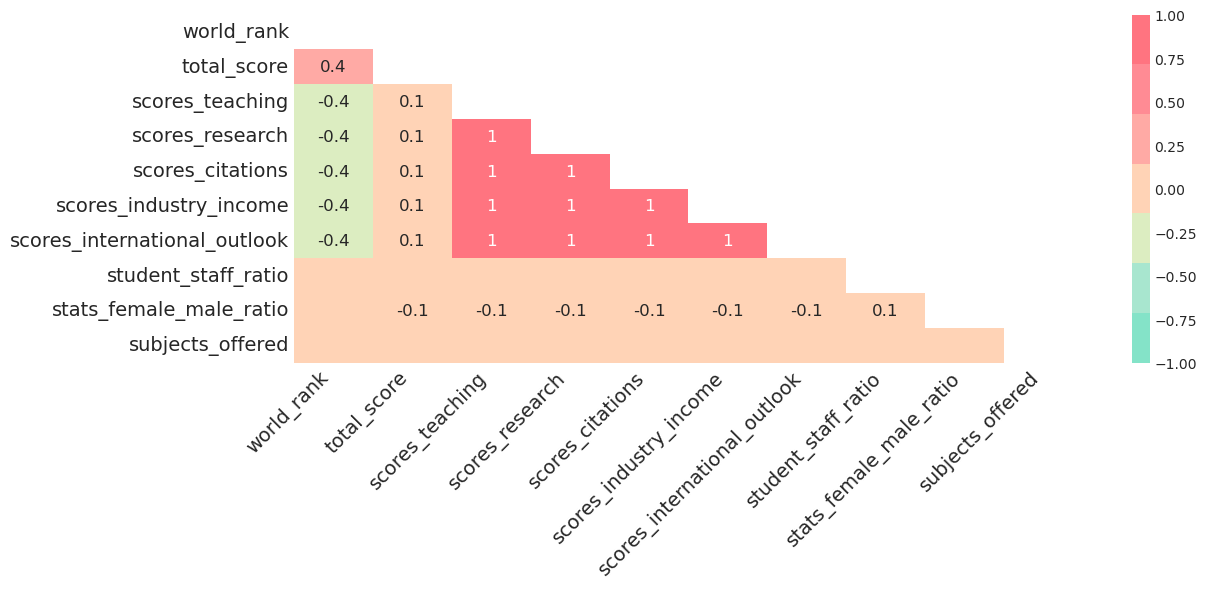

In [13]:
cmap = ListedColormap(custom_palette3, name='cmap1')
msno.heatmap(df, cmap=cmap, figsize=(13, 6), fontsize=14);

# **Visualizing universities by year and type**

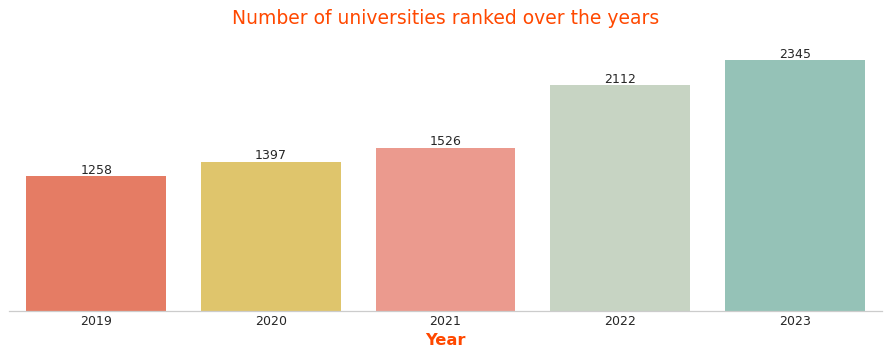

In [14]:
year_df = df['year'].value_counts().sort_values()
fig, ax = plt.subplots(figsize=(10,4), dpi=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

sns.countplot(data=df, x='year', palette=custom_palette1);

# add values on top of each bar
ax.bar_label(ax.containers[0])

ax.set_xlabel('Year', fontsize=13, color = '#ff4800');
fig.suptitle('Number of universities ranked over the years', fontsize=15, color = '#ff4800');

In [15]:
print('Number of countries with ranked universities: ',df['country'].nunique())

Number of countries with ranked universities:  122


# **Distribution of universities across the world 🌏**

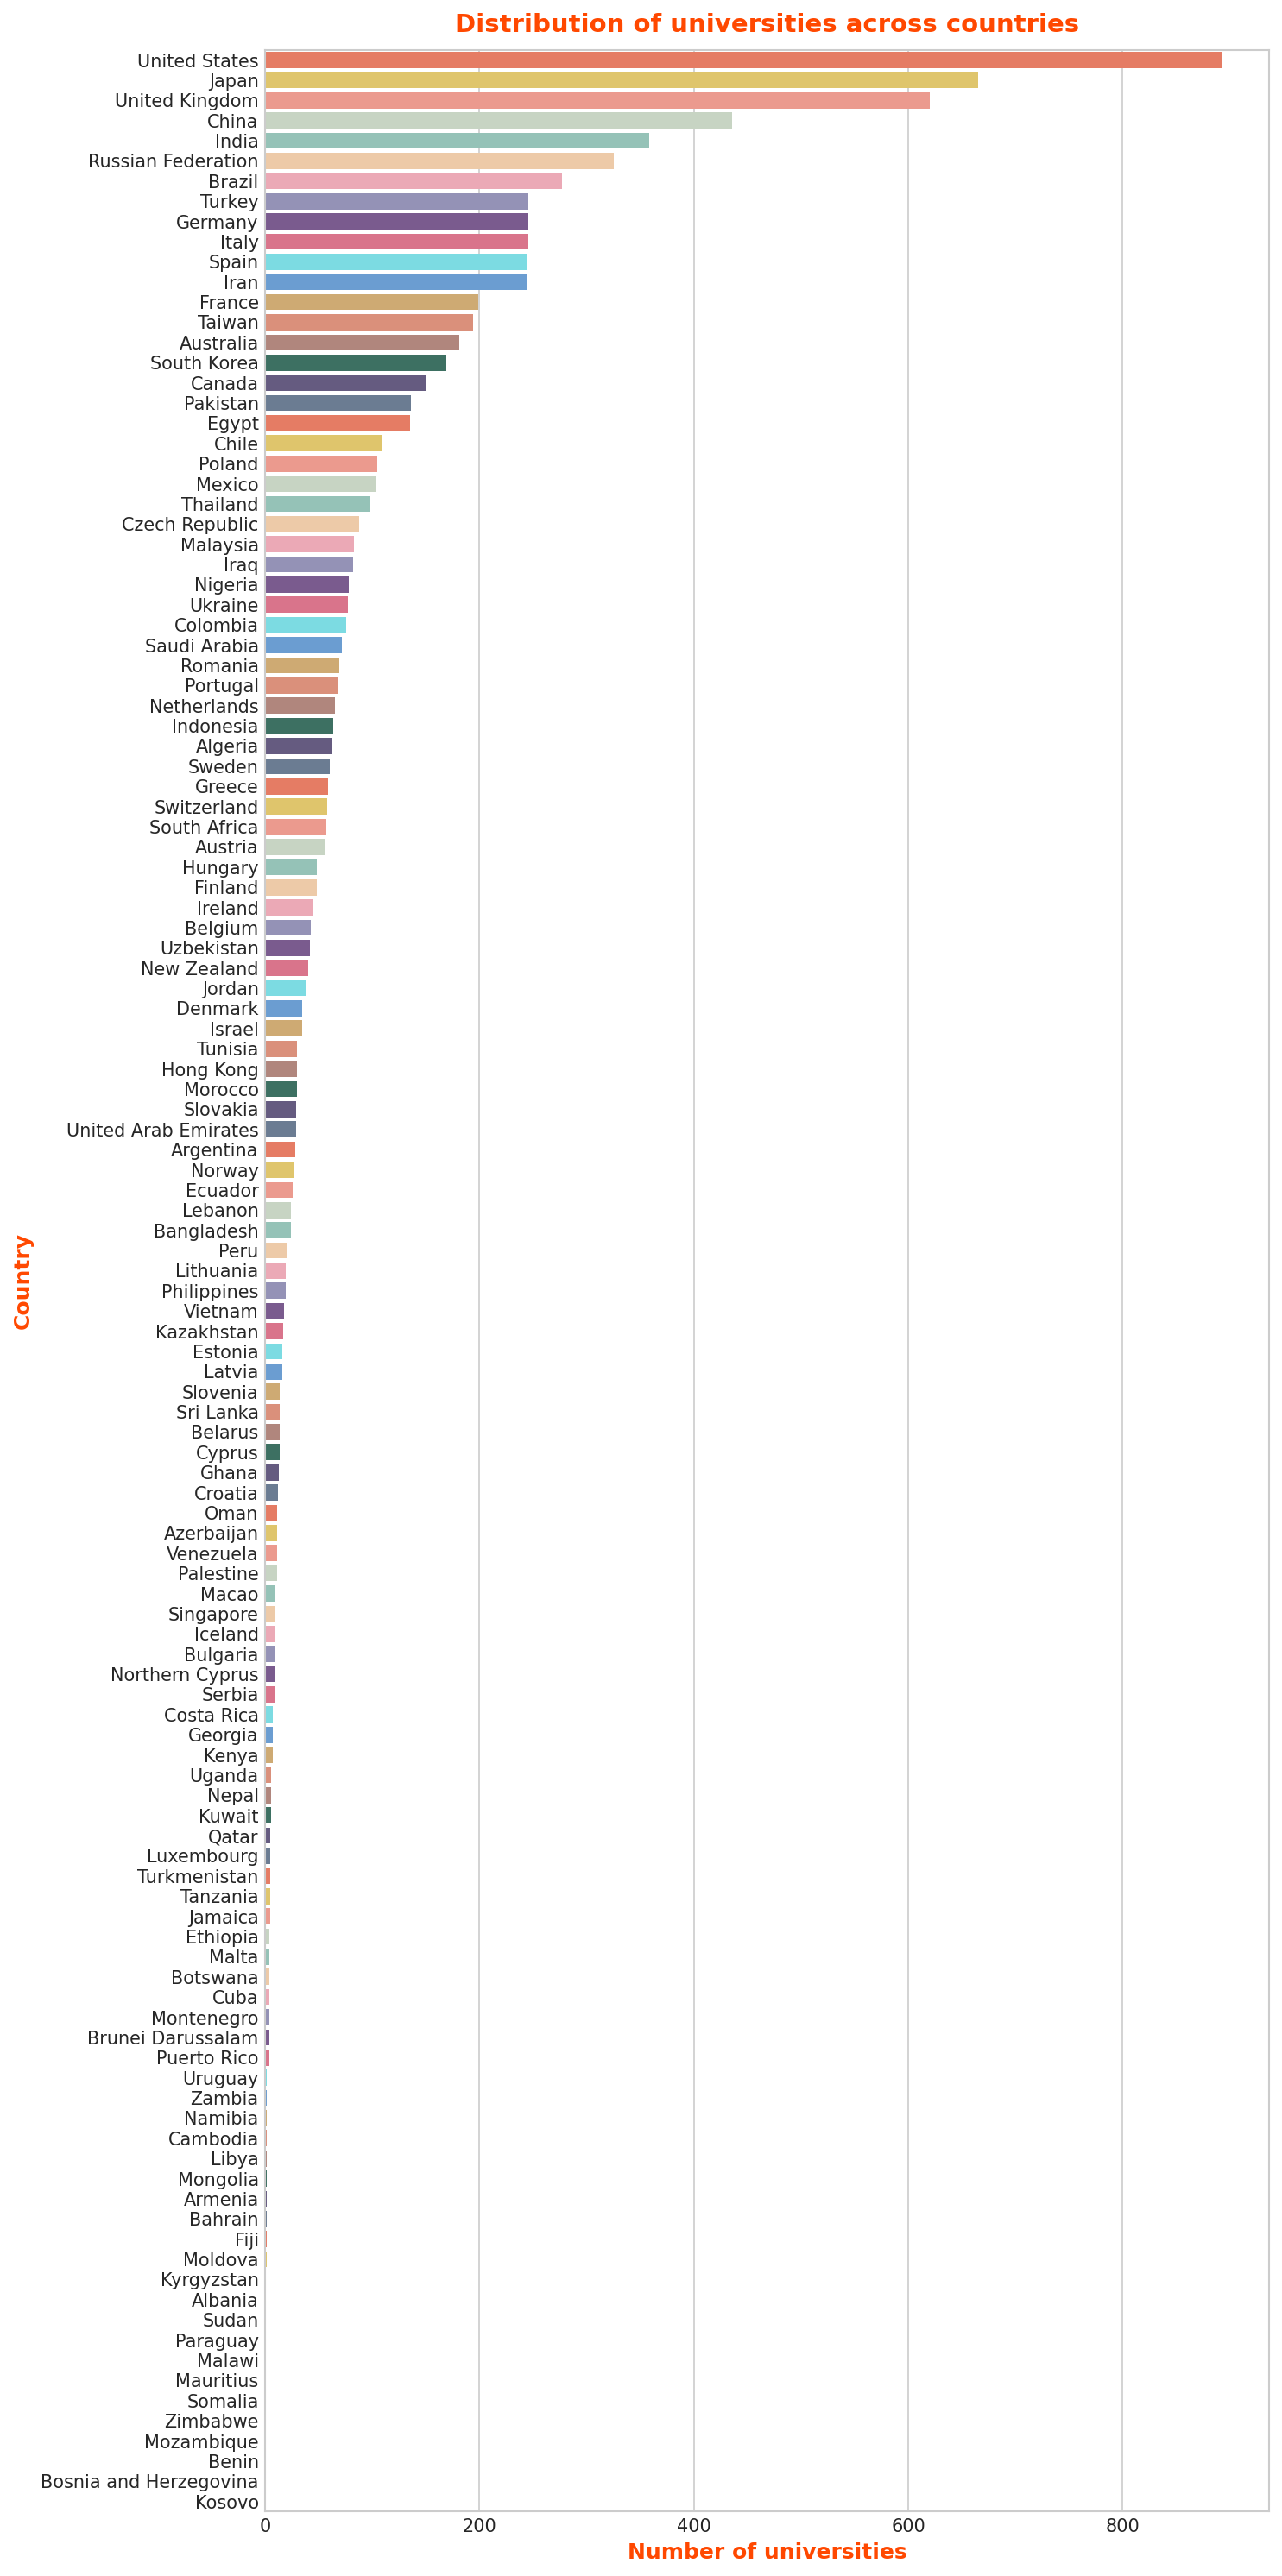

In [16]:
uni_df = df['university_name'].value_counts()

fig, ax = plt.subplots(figsize=(10,20), dpi=150)

sns.countplot(data=df, y='country', order=df.country.value_counts().index, palette=custom_palette1);
plt.xlabel('Number of universities', fontsize=12, color = '#ff4800')
plt.ylabel('Country', fontsize=12, color = '#ff4800')
plt.title("Distribution of universities across countries", fontsize=14, color = '#ff4800');

# plt.savefig('countrywise.png')

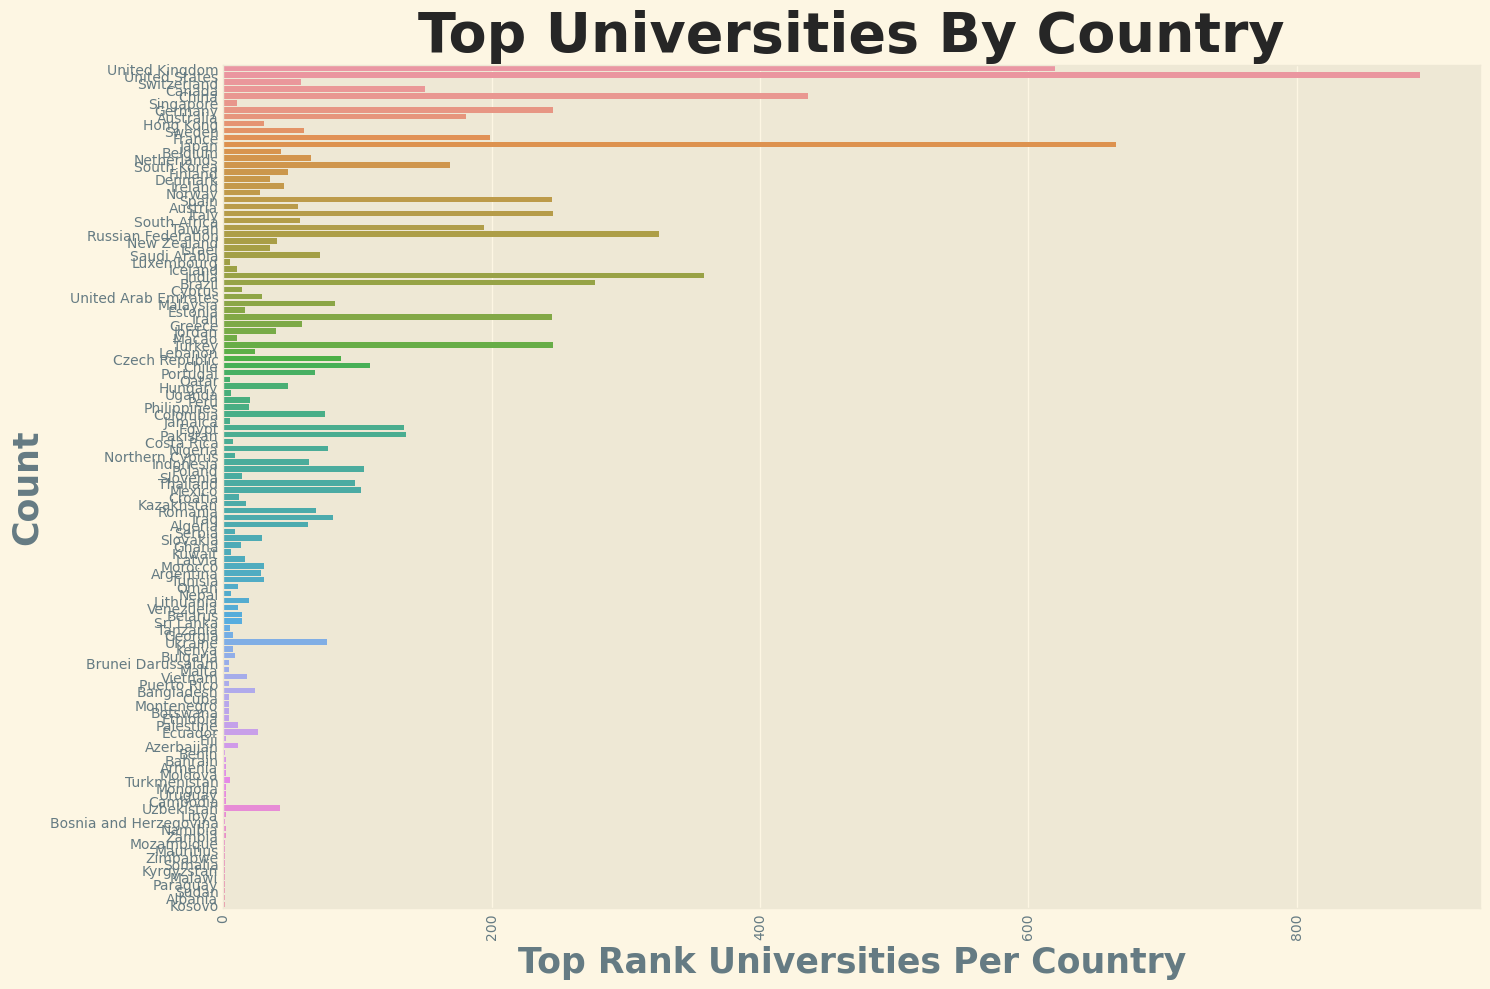

In [17]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(15,10))
sns.countplot(data=df,y='country')                            #Note here we are using seaborn as sns which is an in-nuilt library in python that uses mtplotlib underneath to plot graphs.
plt.xticks(rotation='vertical')
plt.title('Top Universities By Country',fontsize=40)            #Note labelling the data
plt.ylabel('Count',fontsize=25)                                 #Note labelling the y-label
plt.xlabel('Top Rank Universities Per Country',fontsize=25)     #Note labelling the x-label
plt.show()

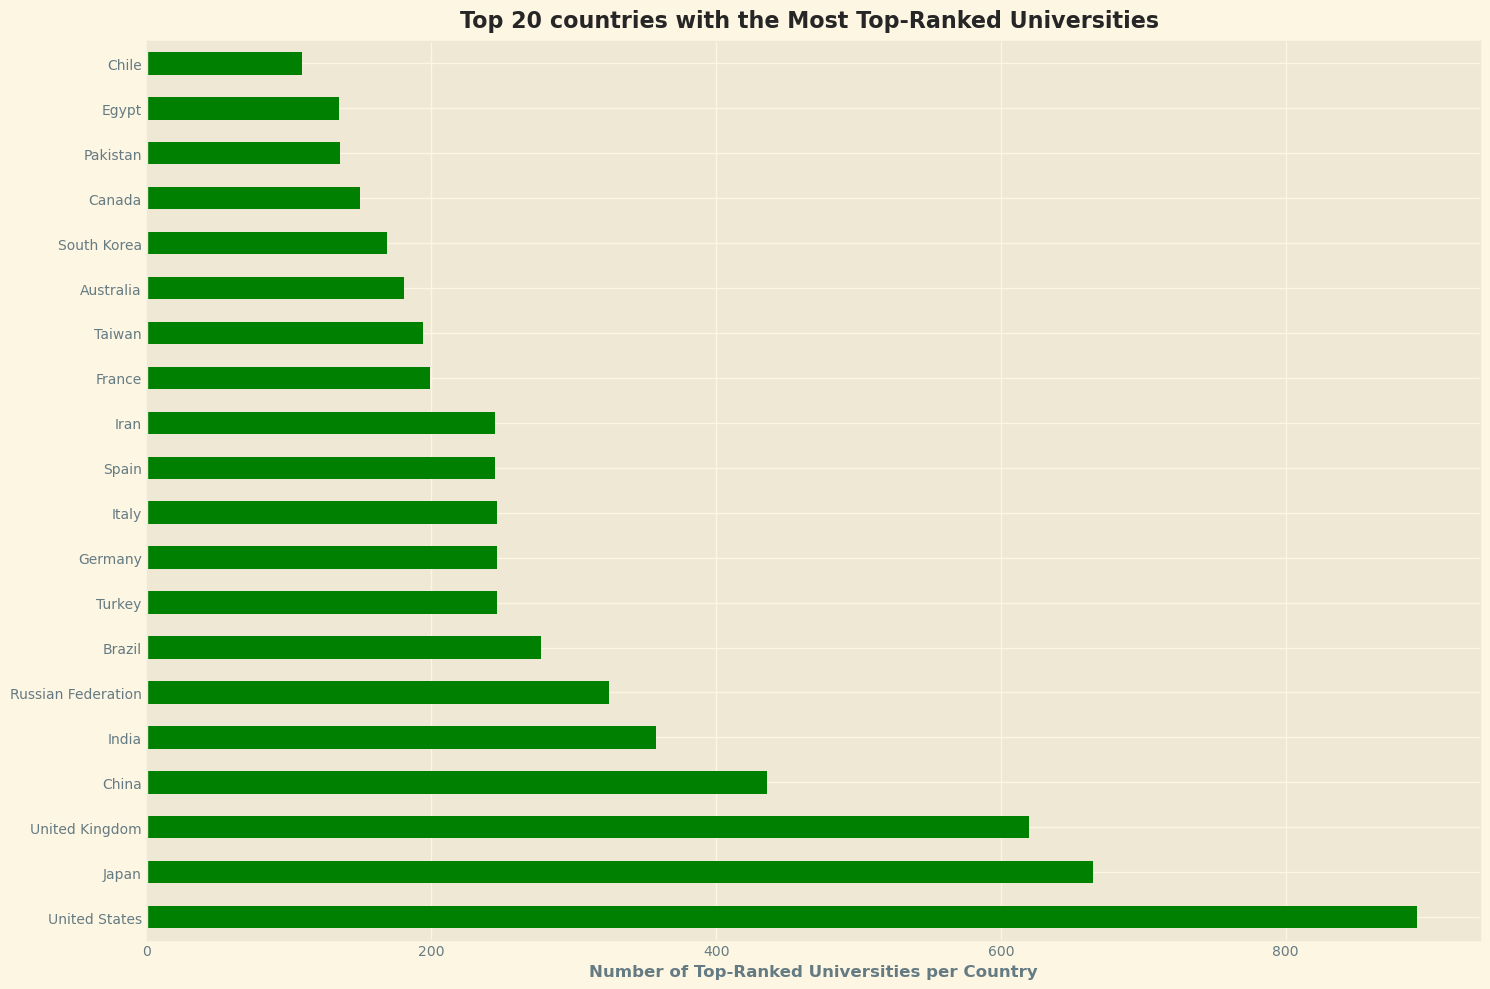

In [18]:
plt.style.use('_mpl-gallery')
plt.figure(figsize=(15,10))
plt.title("Top 20 countries with the Most Top-Ranked Universities ")     #Note adding titlr to the data.
plt.xlabel("Number of Top-Ranked Universities per Country")              #Note labelling of x-axis.
df["country"].value_counts().head(20).plot(kind="barh",color="g")      #Note adding color to the horizontal bars.
plt.show()

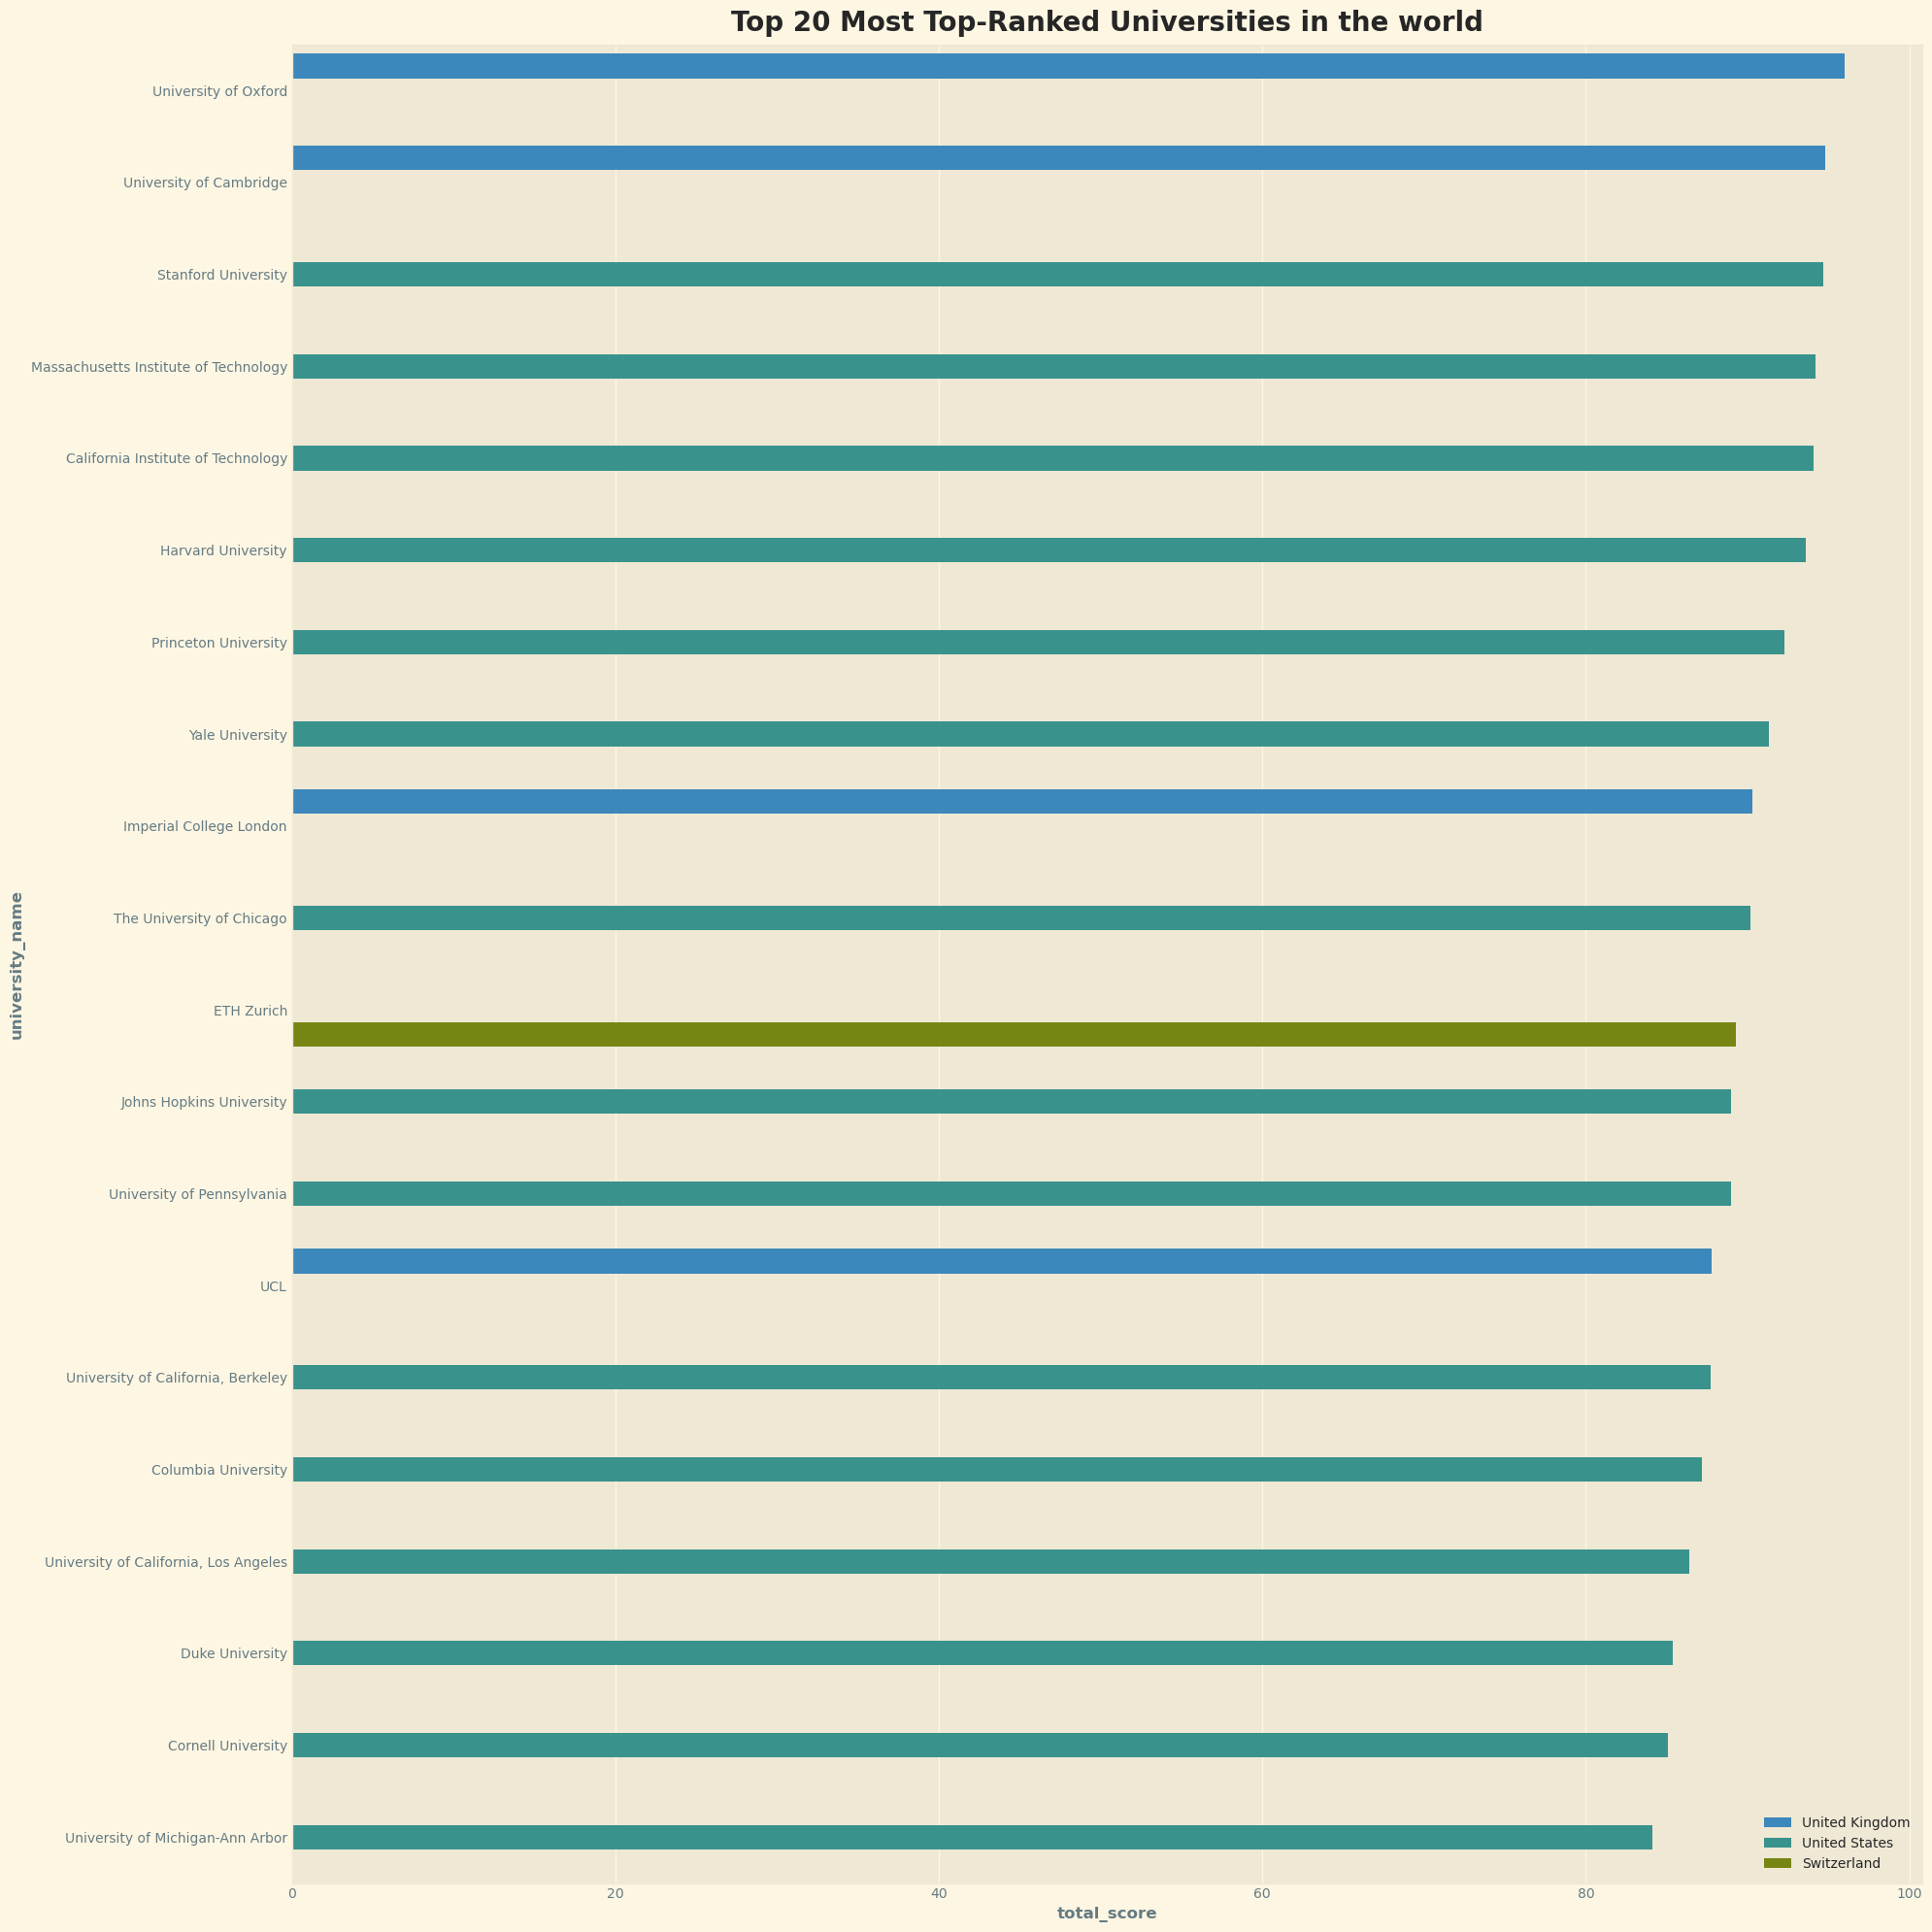

In [19]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,20))
plt.title("Top 20 Most Top-Ranked Universities in the world",fontsize=20)
sns.barplot(data=df.head(20),x="total_score",y="university_name",hue="country")    #Note use of barplot where hue reefers to the location of thr desired columns.
plt.legend()
plt.show()

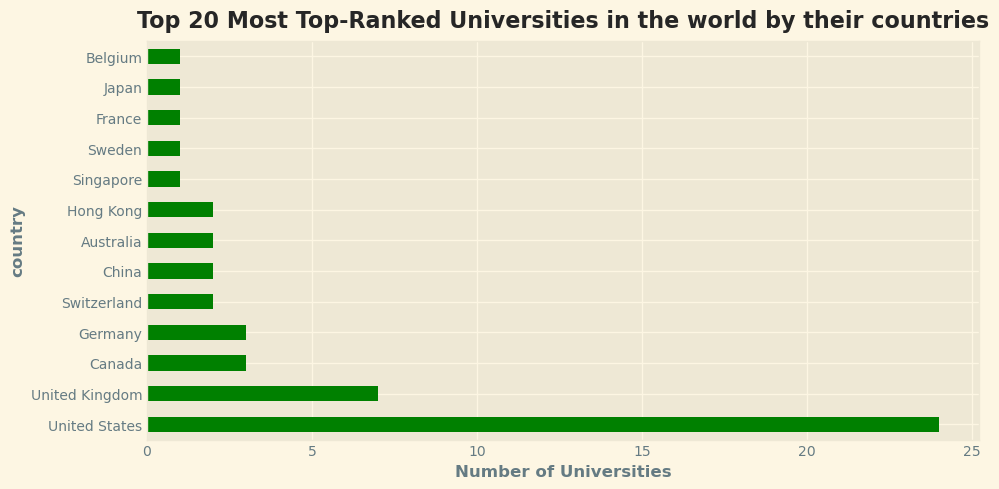

In [20]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(10,5))
plt.title("Top 20 Most Top-Ranked Universities in the world by their countries")
plt.xlabel("Number of Universities")
plt.ylabel("country")
df.head(50)["country"].value_counts().plot(kind="barh",color="g")     
plt.show()


In [21]:
df.sort_values('world_rank')[:60]['university_name'].unique()

array(['University of Oxford', 'Harvard University',
       'California Institute of Technology', 'Stanford University',
       'University of Cambridge', 'Massachusetts Institute of Technology',
       'Princeton University', 'University of California, Berkeley',
       'Yale University', 'The University of Chicago',
       'Imperial College London', 'Columbia University', 'ETH Zurich',
       'University of Pennsylvania', 'Johns Hopkins University'],
      dtype=object)

In [44]:
# array(['University of Oxford', 'Harvard University',
#        'California Institute of Technology', 'Stanford University',
#        'University of Cambridge', 'Massachusetts Institute of Technology',
#        'Princeton University', 'University of California, Berkeley',
#        'Yale University', 'The University of Chicago'

# **Top University Rankings year on year**

In [22]:
# university_df.sort_values('rank_display')[:60]
top_unis = ['University of Oxford', 'Harvard University',
       'California Institute of Technology', 'Stanford University',
       'University of Cambridge', 'Massachusetts Institute of Technology',
       'Princeton University', 'University of California, Berkeley',
       'Yale University', 'The University of Chicago']
topunis_df = df[df['university_name'].isin(top_unis)][['year','university_name','world_rank']].reset_index(drop=True)
topunis_df['world_rank'] = topunis_df['world_rank'].apply(lambda x:replace_eq(str(x)))

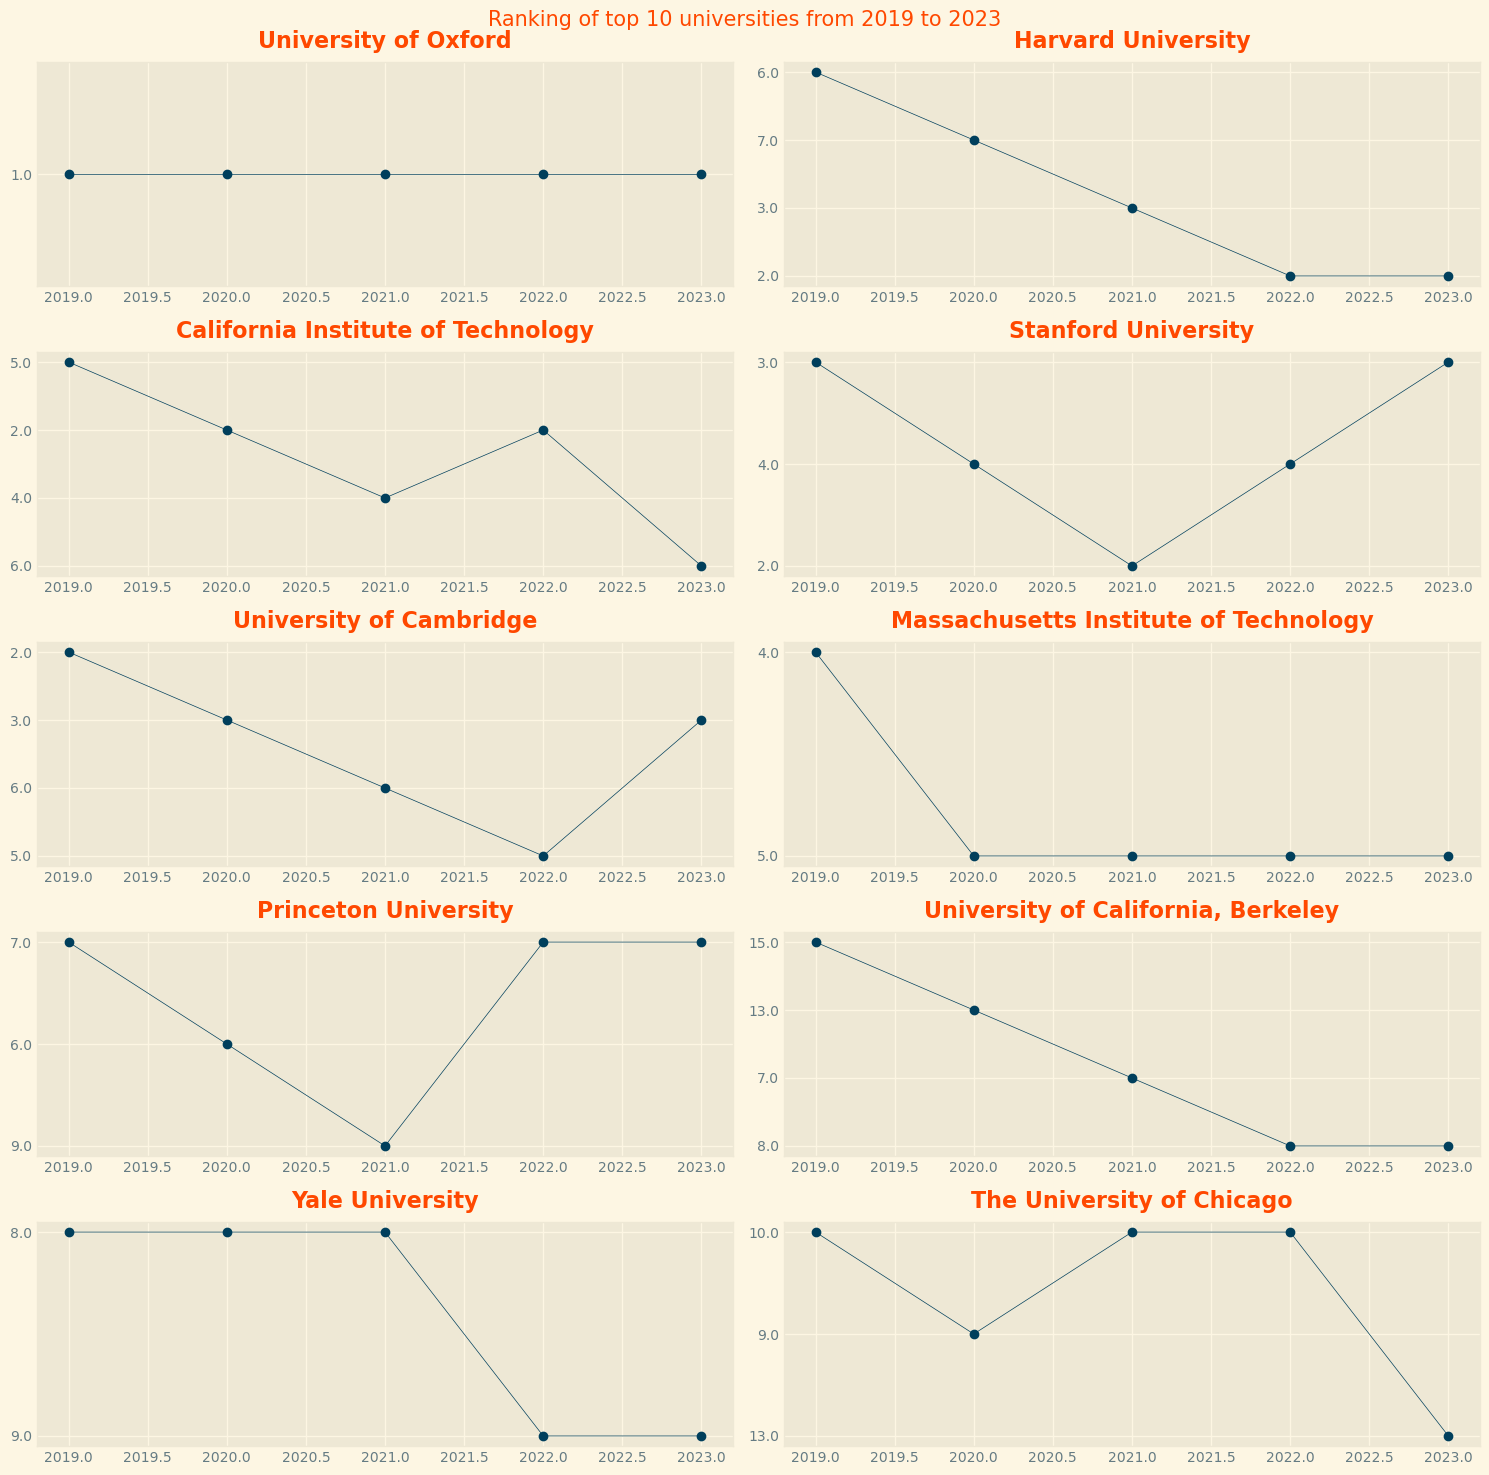

In [23]:
fig = plt.figure(figsize=(15,15), dpi=100)

for uni, i in zip(top_unis, range(1, 11)):
    new_df = topunis_df[topunis_df['university_name'] == uni]
    ax = fig.add_subplot(5, 2, i)
    ax.plot(new_df['year'], new_df['world_rank'], color='#003f5c', marker='o', linewidth='0.5')
    plt.gca().invert_yaxis()
    ax.set_title(uni, color='#ff4800')
    
fig.subplots_adjust(wspace=0.2, hspace=0.6, top=0.92)
fig.suptitle('Ranking of top 10 universities from 2019 to 2023', fontsize=15, color = '#ff4800');

# **> University of Oxford stands Number 1 last 5 years.**

# **Citation and Teaching Impact on Rankings**

In [24]:
# Create data frame for top 100 universities
df_top100 = df[df['university_name'].isin(top_unis)]
df_top100['world_rank'] = df_top100['world_rank'].astype(int)

# import graph objects as "go"
import plotly.graph_objects as go

# Creating trace on citations
trace_cite = go.Scatter(x = df_top100['world_rank'],
                        y = df_top100.scores_citations,
                        mode = "lines",
                        name = "citations",
                        marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                        text= df_top100.university_name)

In [25]:
# Creating trace on teaching
trace_teach = go.Scatter(x = df_top100['world_rank'],
                         y = df_top100.scores_teaching,
                         mode = "lines+markers",
                         name = "teaching",
                         marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                         text= df_top100.university_name)

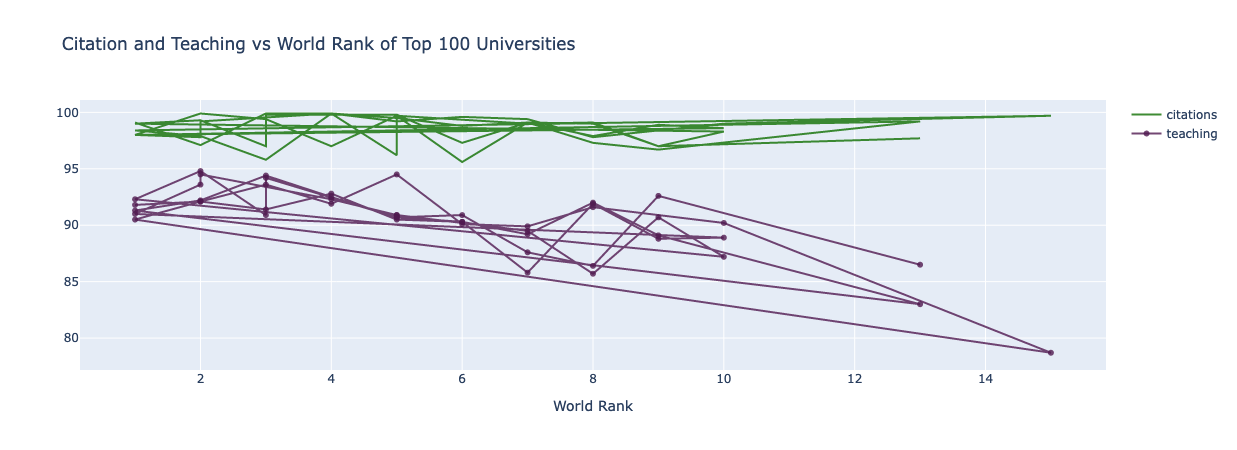

In [26]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *

init_notebook_mode(connected=True)  

# Create a list to add traces
data = [trace_cite, trace_teach]

layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False))
fig1 = dict(data = data, layout = layout)
iplot(fig1)

# **Better universities have better scores of Citations and Teaching**

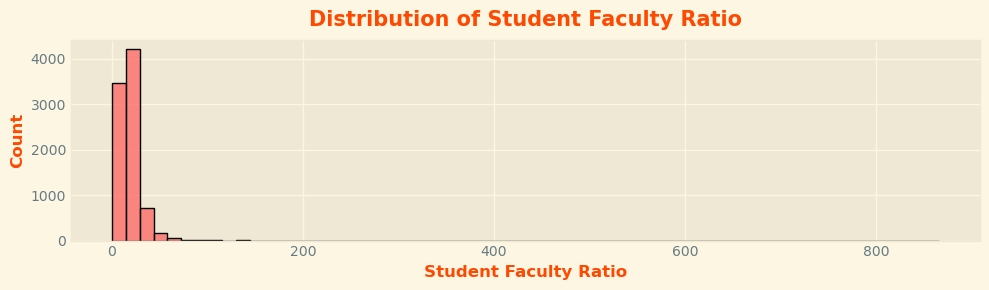

In [27]:
plt.figure(figsize=(10,3), dpi=100)
sns.histplot(data=df, x='student_staff_ratio', bins=60, color=student_faculty_palette[1]);
plt.xlabel('Student Faculty Ratio', color = '#ff4800')
plt.ylabel('Count', color = '#ff4800')
plt.title('Distribution of Student Faculty Ratio', fontsize=15, color = '#ff4800');

In [28]:
df.columns

Index(['rank_order', 'world_rank', 'university_name', 'total_score',
       'scores_overall_rank', 'scores_teaching', 'scores_teaching_rank',
       'scores_research', 'scores_research_rank', 'scores_citations',
       'scores_citations_rank', 'scores_industry_income',
       'scores_industry_income_rank', 'scores_international_outlook',
       'scores_international_outlook_rank', 'country', 'num_students',
       'student_staff_ratio', 'international_students',
       'stats_female_male_ratio', 'aliases', 'subjects_offered', 'closed',
       'unaccredited', 'year'],
      dtype='object')

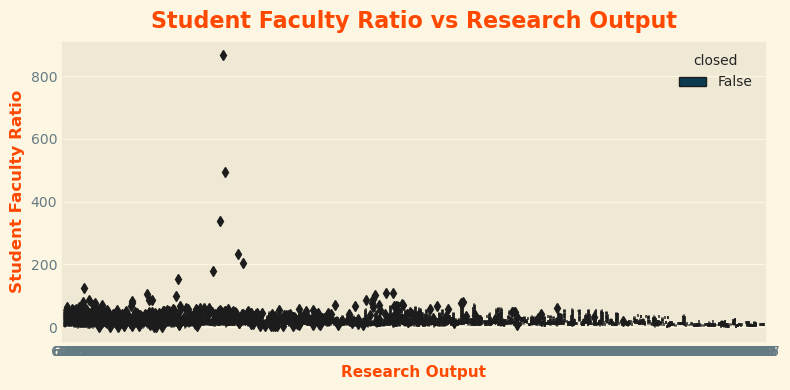

In [29]:
plt.figure(figsize=(8,4), dpi=100)
sns.boxplot(data=df, y='student_staff_ratio', x='scores_research', hue='closed', palette=student_faculty_palette); #, hue='type'
plt.xlabel('Research Output', fontsize=11, color = '#ff4800')
plt.ylabel('Student Faculty Ratio',color = '#ff4800')
plt.title('Student Faculty Ratio vs Research Output', color = '#ff4800');

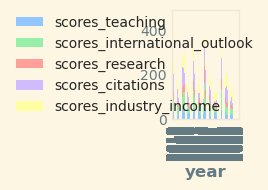

In [30]:
# Plot evolution of each criteria of the ranking
bar_criteria_df = df[['year', 'scores_teaching', 'scores_international_outlook', 'scores_research', 'scores_citations', 'scores_industry_income']]
ax = bar_criteria_df.plot.bar(
    stacked=True,
    x='year'
)

ax.legend(loc=7, bbox_to_anchor=(1.4, 0.5)) # Tweaking until it looks nice, hacky

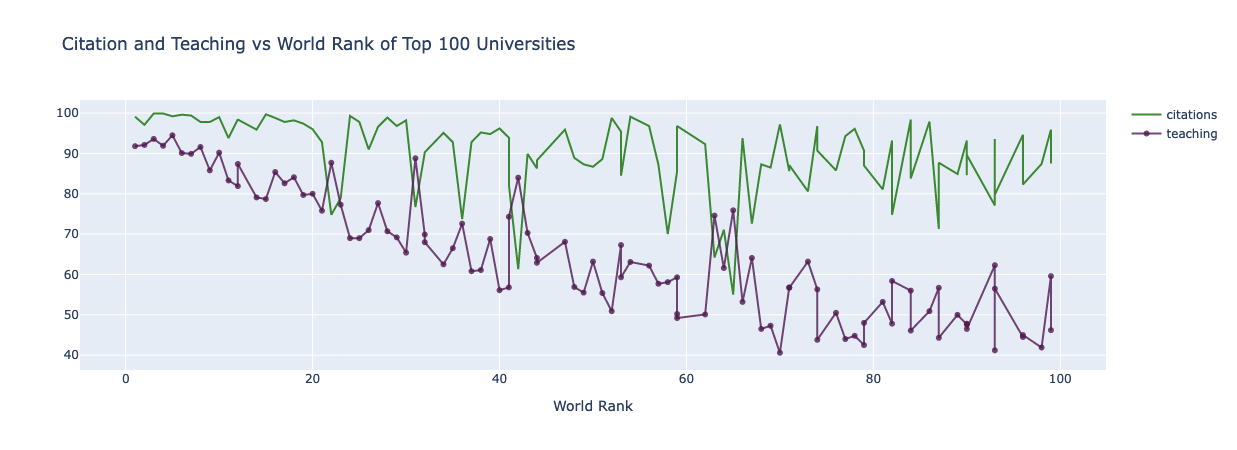

In [32]:
# prepare data frame
df100 = df.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = df100.world_rank,
                    y = df100.scores_citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.university_name)
# Creating trace2
trace2 = go.Scatter(
                    x = df100.world_rank,
                    y = df100.scores_teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df100.university_name)
data = [trace1, trace2]
layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

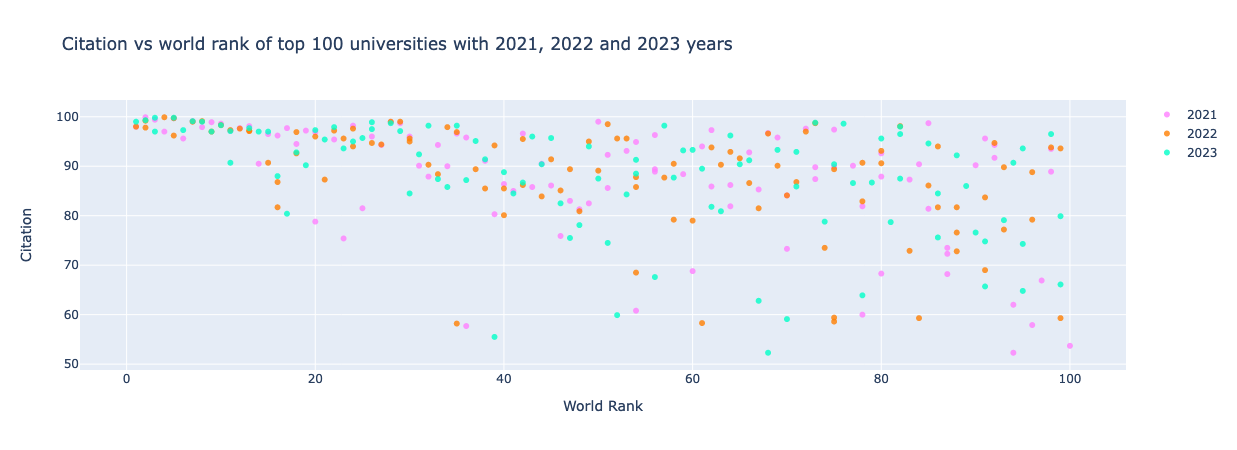

In [33]:
# prepare data frames
df2021 = df[df.year == 2021].iloc[:100,:]
df2022 = df[df.year == 2022].iloc[:100,:]
df2023 = df[df.year == 2023].iloc[:100,:]
# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df2021.world_rank,
                    y = df2021.scores_citations,
                    mode = "markers",
                    name = "2021",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2021.university_name)
# creating trace2
trace2 =go.Scatter(
                    x = df2022.world_rank,
                    y = df2022.scores_citations,
                    mode = "markers",
                    name = "2022",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2022.university_name)
# creating trace3
trace3 =go.Scatter(
                    x = df2023.world_rank,
                    y = df2023.scores_citations,
                    mode = "markers",
                    name = "2023",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2023.university_name)
data = [trace1, trace2, trace3]
layout = dict(title = 'Citation vs world rank of top 100 universities with 2021, 2022 and 2023 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

# **Top 3 Universities Citation and Teaching scores**

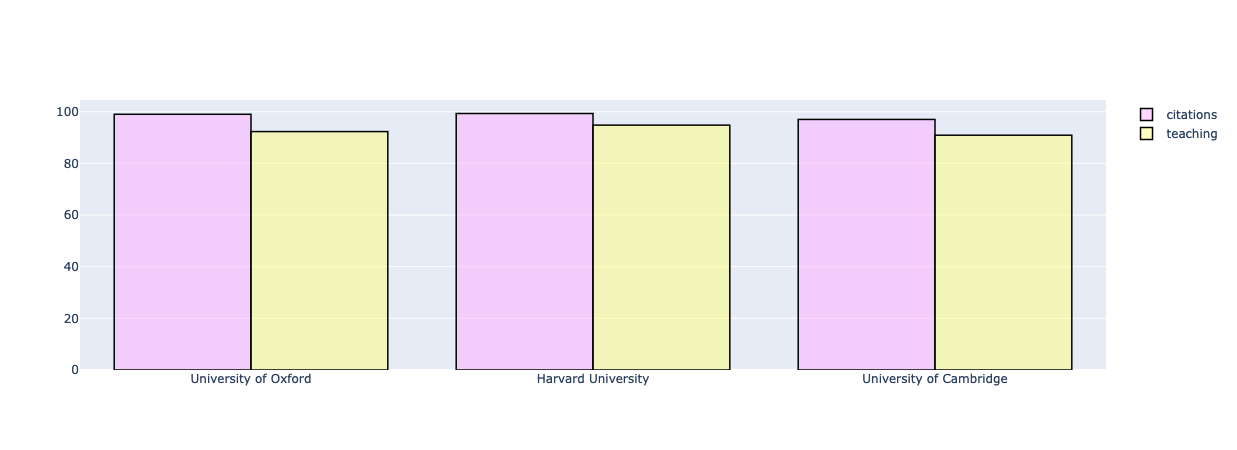

In [34]:
# prepare data frames
df2023 = df[df.year == 2023].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df2023.university_name,
                y = df2023.scores_citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2023.country)
# create trace2 
trace2 = go.Bar(
                x = df2023.university_name,
                y = df2023.scores_teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2023.country)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)


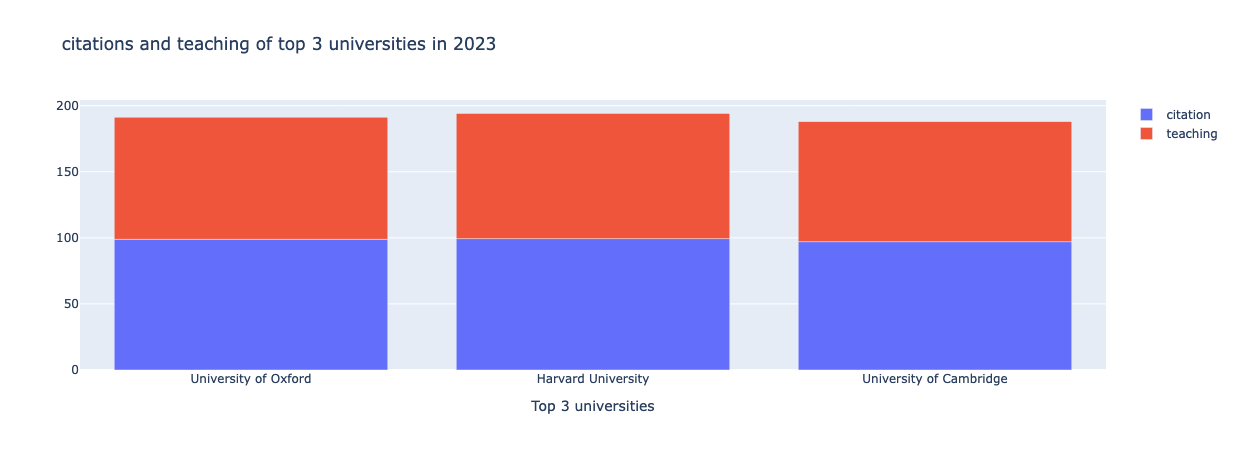

In [36]:
# prepare data frames
df2023 = df[df.year == 2023].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go

x = df2023.university_name

trace1 = {
  'x': x,
  'y': df2023.scores_citations,
  'name': 'citation',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': df2023.scores_teaching,
  'name': 'teaching',
  'type': 'bar'
};
data = [trace1, trace2];
layout = {
  'xaxis': {'title': 'Top 3 universities'},
  'barmode': 'relative',
  'title': 'citations and teaching of top 3 universities in 2023'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# **Trends of Citations and Income over Rankings**

/opt/conda/lib/python3.7/site-packages/plotly/tools.py:464: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



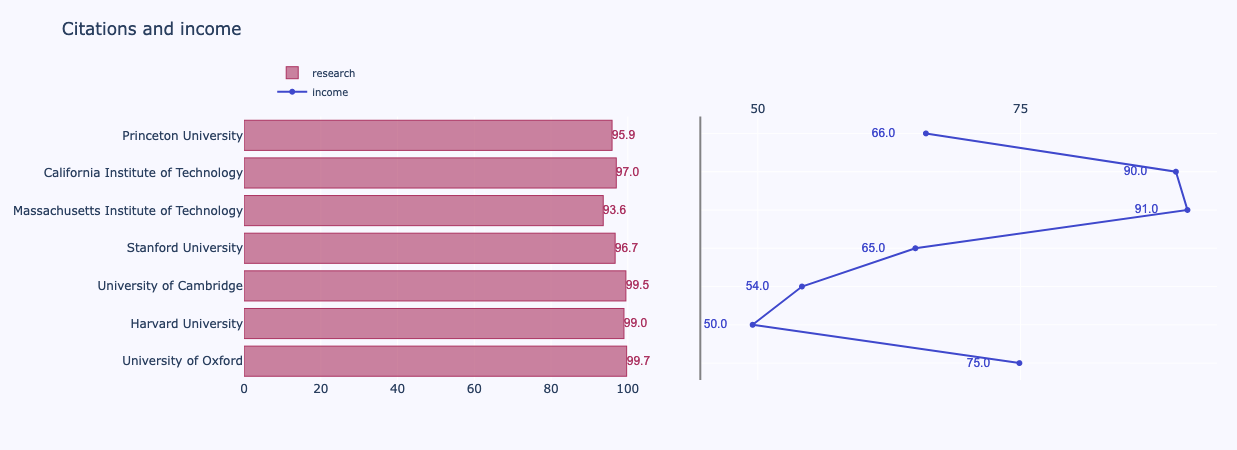

In [37]:
# import graph objects as "go" and import tools
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
# prepare data frames
df2023 = df[df.year == 2023].iloc[:7,:]

y_saving = [each for each in df2023.scores_research]
y_net_worth  = [float(each) for each in df2023.scores_industry_income]
x_saving = [each for each in df2023.university_name]
x_net_worth  = [each for each in df2023.university_name]
trace0 = go.Bar(
                x=y_saving,
                y=x_saving,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='research',
                orientation='h',
)
trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)
layout = dict(
                title='Citations and income',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)
annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)


**MIT and California Institute maintained both income and Citations score >90**

# **Students Enrolled in Universities**

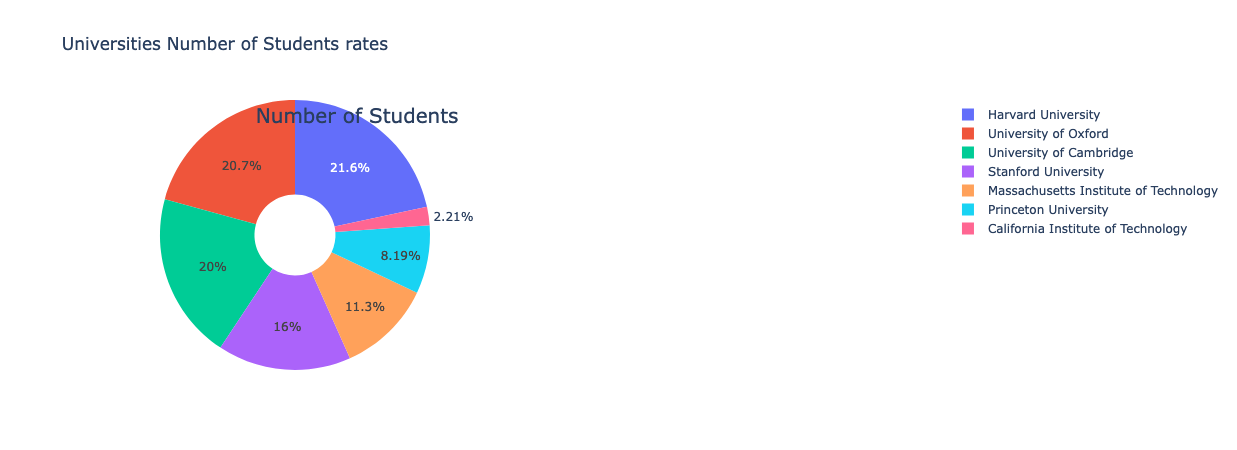

In [38]:
# data preparation
df2023 = df[df.year == 2023].iloc[:7,:]
pie1 = df2023.num_students
pie1_list = [float(each.replace(',', '.')) for each in df2023.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2023.university_name
# figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Universities Number of Students rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Students",
                "x": 0.20,
                "y": 1
             },
        ]
    }
}
iplot(fig)


# **Strangely Hardvard University crossed Oxford although Oxford stands Rank-1**

# **Teaching scores and Rankings**

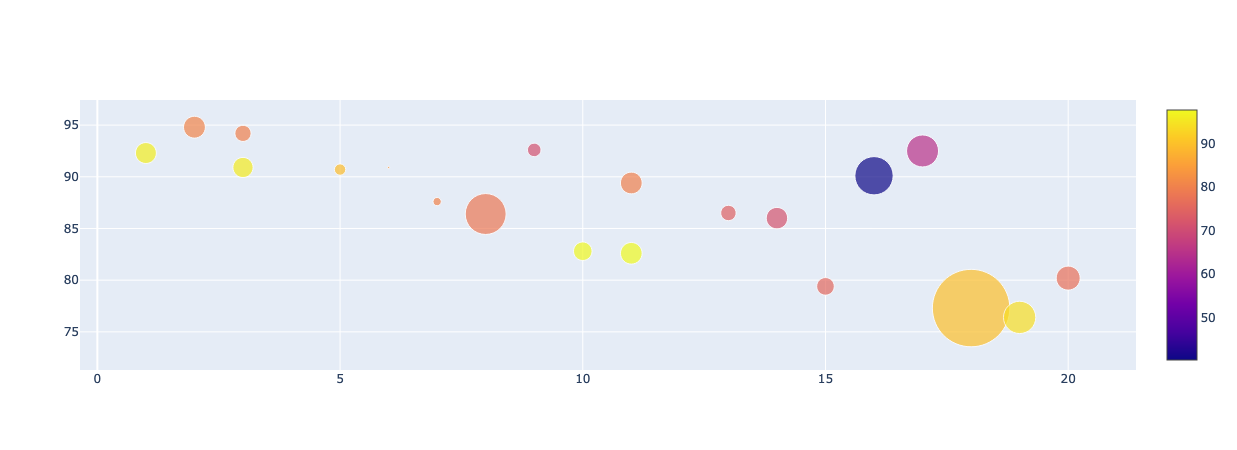

In [39]:
# data preparation
df2023 = df[df.year == 2023].iloc[:20,:]
num_students_size  = [float(each.replace(',', '.')) for each in df2023.num_students]
international_color = [float(each) for each in df2023.scores_international_outlook]
data = [
    {
        'y': df2023.scores_teaching,
        'x': df2023.world_rank,
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        "text" :  df2023.university_name    
    }
]
iplot(data)

> **There is clear trend Staff count improved year on year**

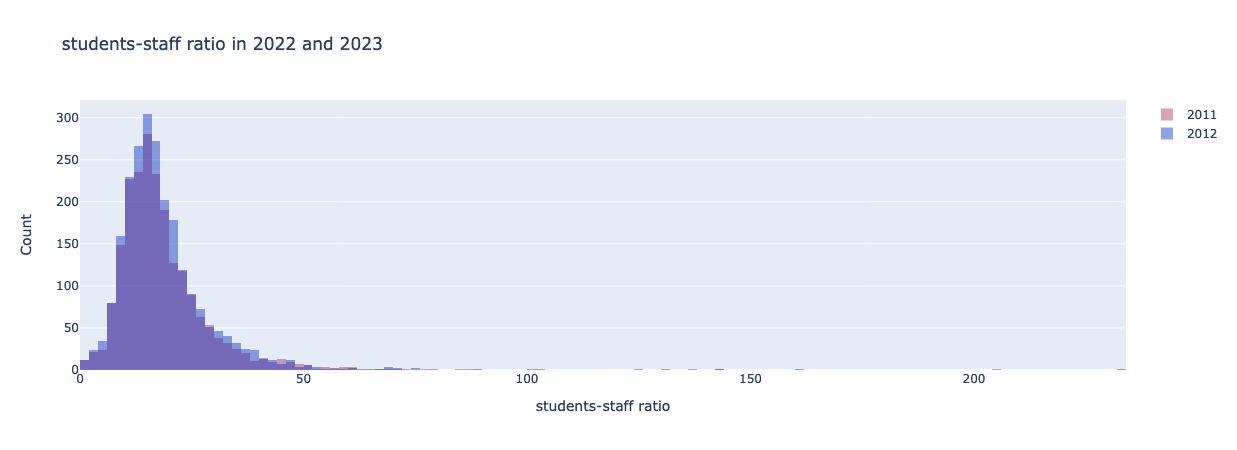

In [40]:
# prepare data
x2022 = df.student_staff_ratio[df.year == 2022]
x2023 = df.student_staff_ratio[df.year == 2023]

trace1 = go.Histogram(
    x=x2022,
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=x2023,
    opacity=0.75,
    name = "2012",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' students-staff ratio in 2022 and 2023',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

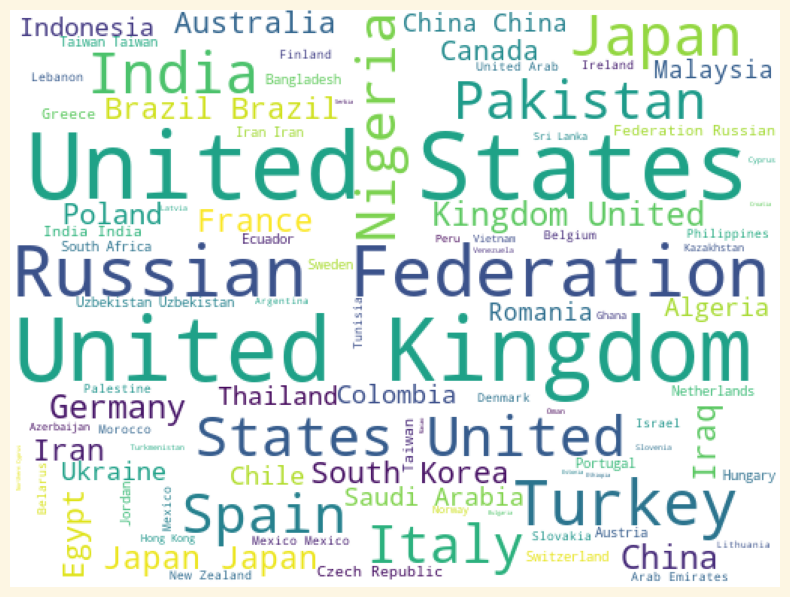

In [41]:
# word cloud library
from wordcloud import WordCloud
# data prepararion
x2023 = df.country[df.year == 2023]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2023))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

# ****Total Scores of Universities in 2023

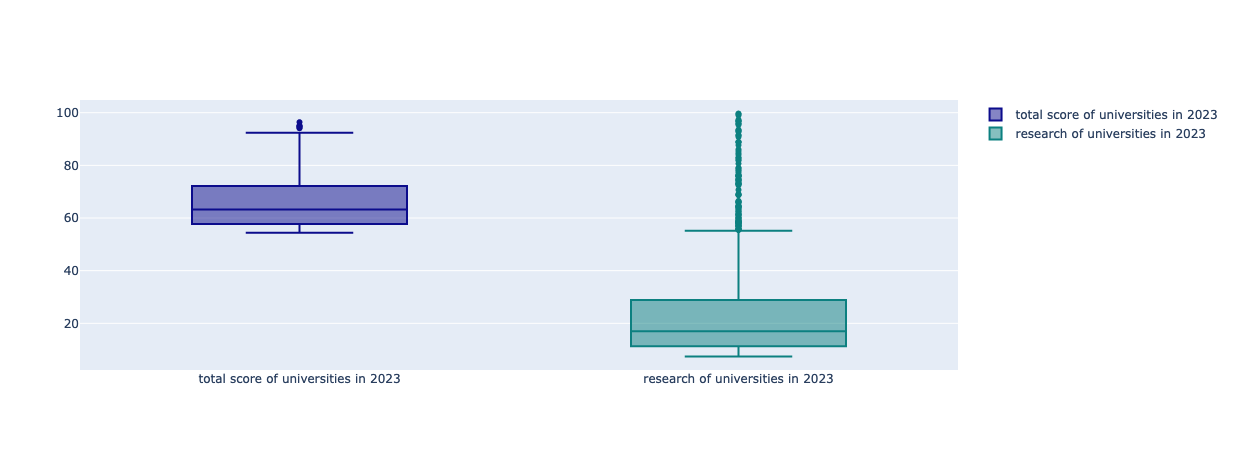

In [42]:
# data preparation
x2023 = df[df.year == 2023]

trace0 = go.Box(
    y=x2023.total_score,
    name = 'total score of universities in 2023',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=x2023.scores_research,
    name = 'research of universities in 2023',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
iplot(data)

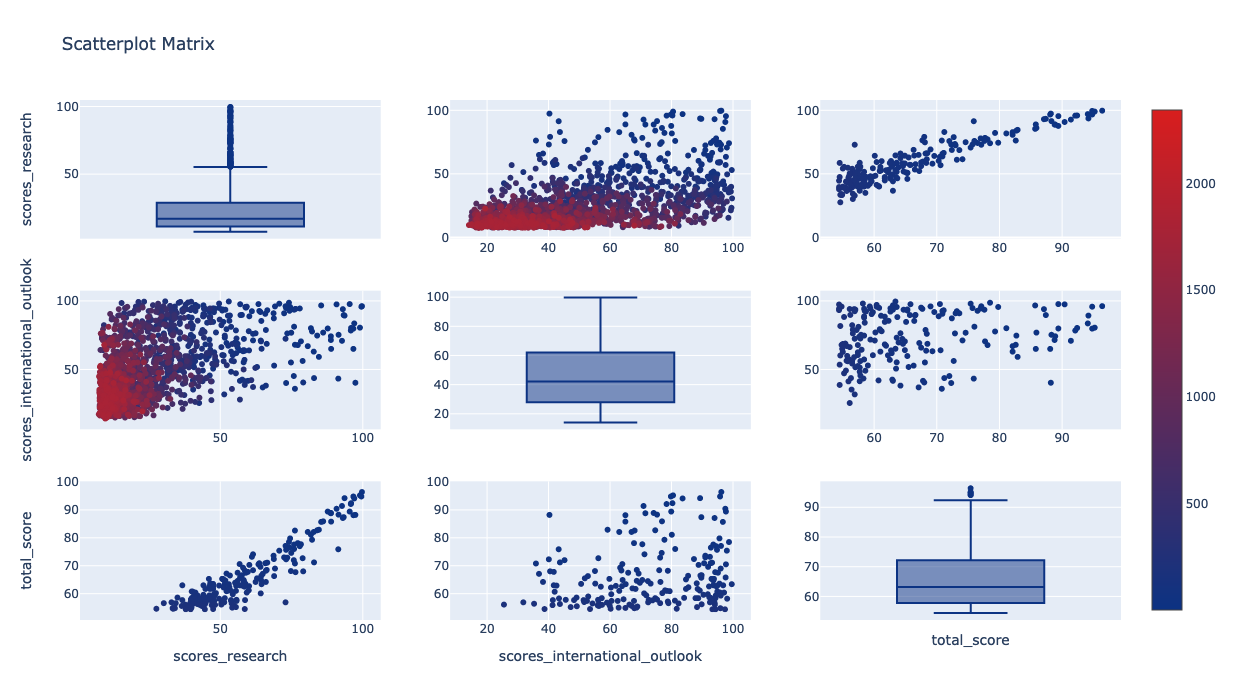

In [44]:
# import figure factory
import plotly.figure_factory as ff
# prepare data
dataframe = df[df.year == 2023]
data2023 = dataframe.loc[:,["scores_research","scores_international_outlook", "total_score"]]
data2023["index"] = np.arange(1,len(data2023)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(data2023, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

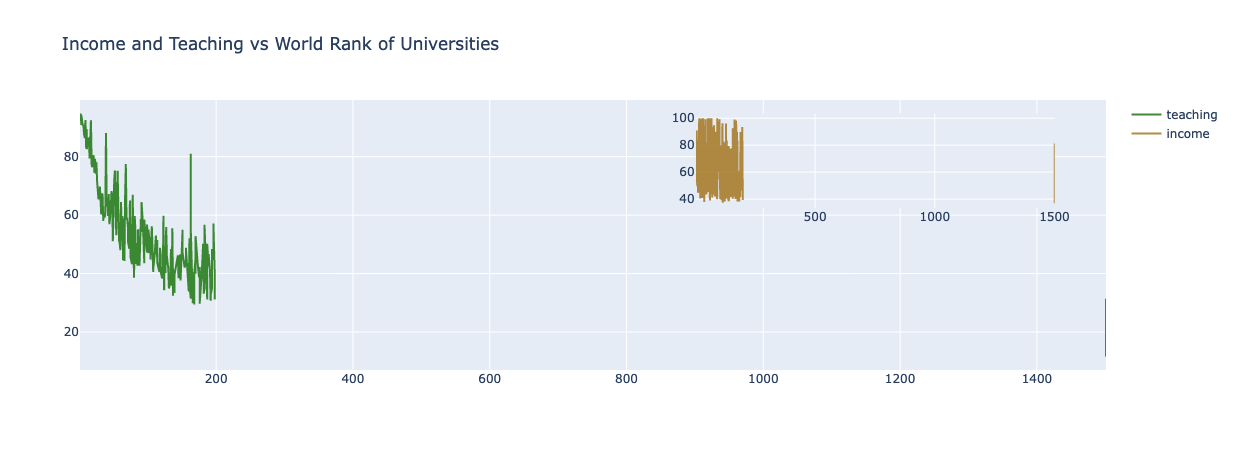

In [45]:
# first line plot
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.scores_teaching,
    name = "teaching",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)
# second line plot
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.scores_industry_income,
    xaxis='x2',
    yaxis='y2',
    name = "income",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Income and Teaching vs World Rank of Universities'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

# **Overall impact of Teaching, Income, Citations and Research on Rankings**

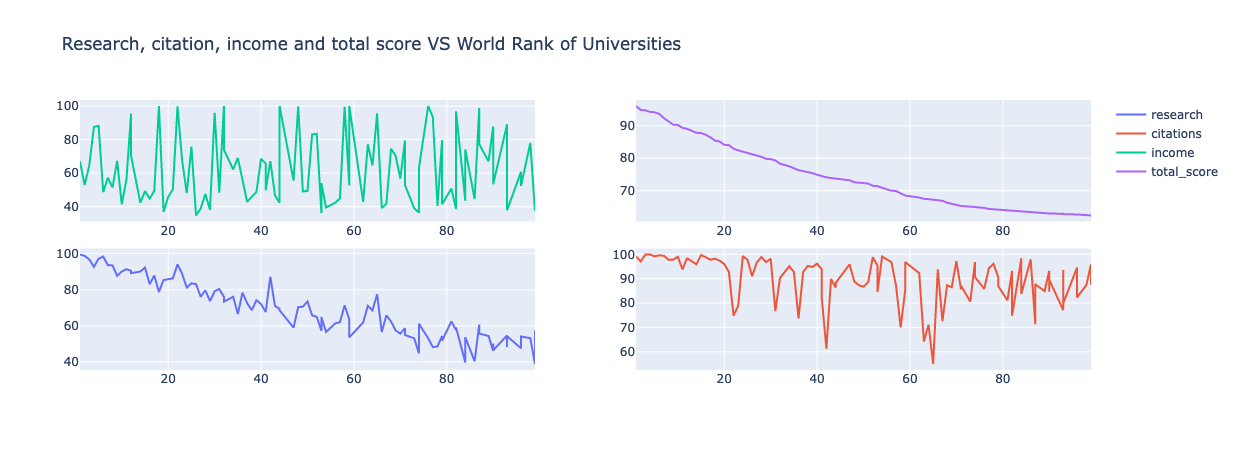

In [46]:
trace1 = go.Scatter(
    x=df.head(100).world_rank,
    y=df.head(100).scores_research,
    name = "research"
)
trace2 = go.Scatter(
    x=df.head(100).world_rank,
    y=df.head(100).scores_citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=df.head(100).world_rank,
    y=df.head(100).scores_industry_income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=df.head(100).world_rank,
    y=df.head(100).total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [47]:
corr = df.corr()
corr

rank_order  world_rank  total_score  \
rank_order                           1.000000   -0.545109    -0.925742   
world_rank                          -0.545109    1.000000    -0.925812   
total_score                         -0.925742   -0.925812     1.000000   
scores_overall_rank                  1.000000   -0.545109    -0.925742   
scores_teaching                     -0.670109   -0.846640     0.885047   
scores_teaching_rank                -0.487873    0.930203    -0.656927   
scores_research                     -0.733098   -0.885874     0.927115   
scores_research_rank                -0.486897    0.954380    -0.744786   
scores_citations                    -0.868966   -0.933176     0.408035   
scores_citations_rank               -0.485633    0.966856    -0.376870   
scores_industry_income              -0.368466   -0.568969     0.150054   
scores_industry_income_rank         -0.491157    0.766829    -0.207044   
scores_international_outlook        -0.632444   -0.796416     0.169822   
scores_international_outlook_rank   -0.488434    0.881416    -0.169260   
student_staff_ratio                  0.003965    0.007709    -0.265180   
closed                                    NaN         NaN          NaN   
unaccredited                        -0.006444    0.012036          NaN   
year                                 0.315377   -0.123517     0.029708   

                                   scores_overall_rank  scores_teaching  \
rank_order                                    1.000000        -0.670109   
world_rank                                   -0.545109        -0.846640   
total_score                                  -0.925742         0.885047   
scores_overall_rank                           1.000000        -0.670109   
scores_teaching                              -0.670109         1.000000   
scores_teaching_rank                         -0.487873        -0.835093   
scores_research                              -0.733098         0.892950   
scores_research_rank                         -0.486897        -0.689280   
scores_citations                             -0.868966         0.506552   
scores_citations_rank                        -0.485633        -0.484382   
scores_industry_income                       -0.368466         0.453864   
scores_industry_income_rank                  -0.491157        -0.451569   
scores_international_outlook                 -0.632444         0.380077   
scores_international_outlook_rank            -0.488434        -0.363063   
student_staff_ratio                           0.003965        -0.101076   
closed                                             NaN              NaN   
unaccredited                                 -0.006444        -0.001818   
year                                          0.315377        -0.041295   

                                   scores_teaching_rank  scores_research  \
rank_order                                    -0.487873        -0.733098   
world_rank                                     0.930203        -0.885874   
total_score                                   -0.656927         0.927115   
scores_overall_rank                           -0.487873        -0.733098   
scores_teaching                               -0.835093         0.892950   
scores_teaching_rank                           1.000000        -0.707771   
scores_research                               -0.707771         1.000000   
scores_research_rank                           0.819047        -0.834383   
scores_citations                              -0.473580         0.575910   
scores_citations_rank                          0.627688        -0.549751   
scores_industry_income                        -0.423281         0.538789   
scores_industry_income_rank                    0.637006        -0.535966   
scores_international_outlook                  -0.366251         0.529760   
scores_international_outlook_rank              0.538347        -0.505967   
student_staff_ratio                            0.087187       

In [48]:
corr.style.background_gradient(cmap='Blues')

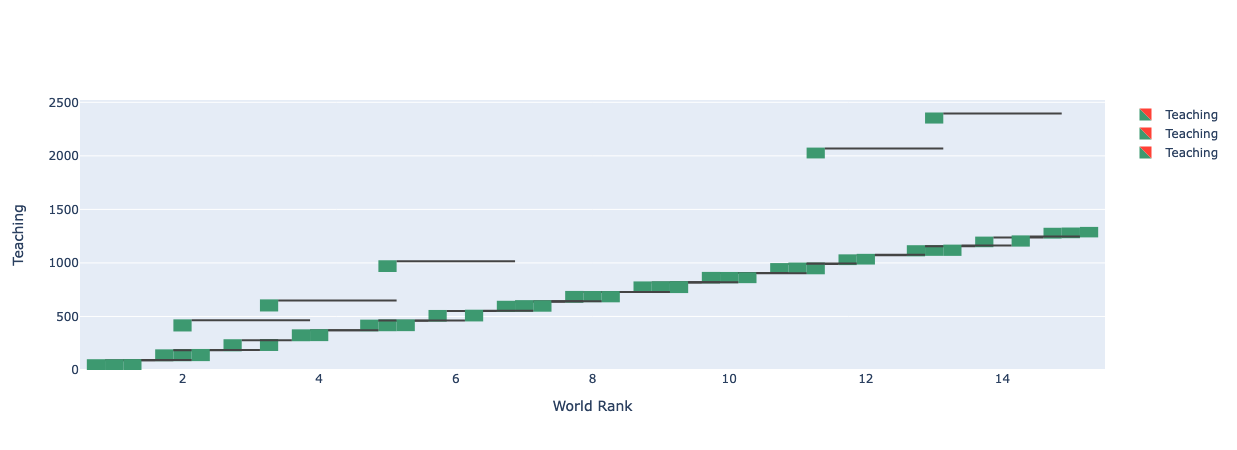

In [49]:
year2021 = df[df.year == 2021].iloc[:15,:]
year2022 = df[df.year == 2022].iloc[:15,:] 
year2023 = df[df.year == 2023].iloc[:15,:] 

trace_2021 = { 
  'x': year2021.world_rank,
  'y': year2021.scores_teaching, 
  'name': 'Teaching', 
  'type': 'waterfall'  
};
trace_2022 = {
  'x': year2022.world_rank,
  'y': year2022.scores_teaching, 
  'name': 'Teaching',   
  'type': 'waterfall'  
};
trace_2023 = {
  'x': year2023.world_rank,
  'y': year2023.scores_teaching, 
  'name': 'Teaching',   
  'type': 'waterfall'  
};
data = [trace_2021, trace_2022,trace_2023]; 
layout = {
  'xaxis': {'title': 'World Rank'},
  'yaxis': {'title':'Teaching'}
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

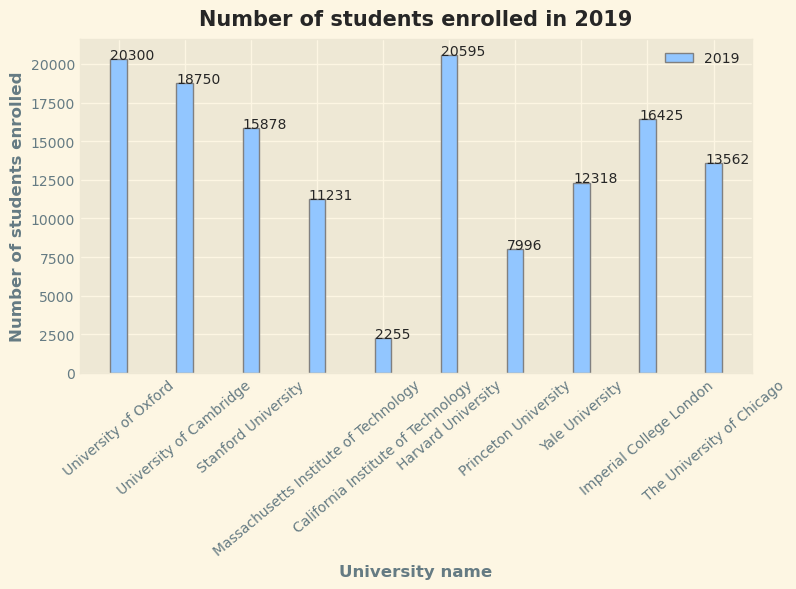

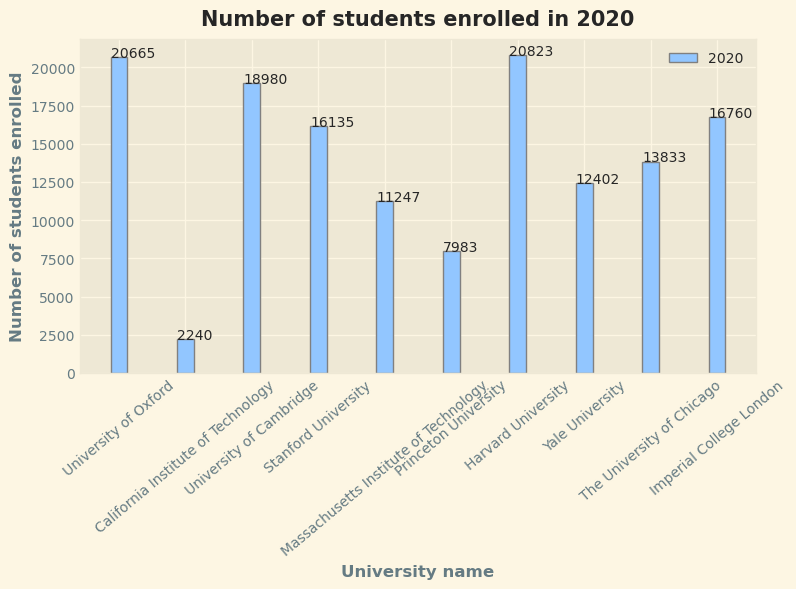

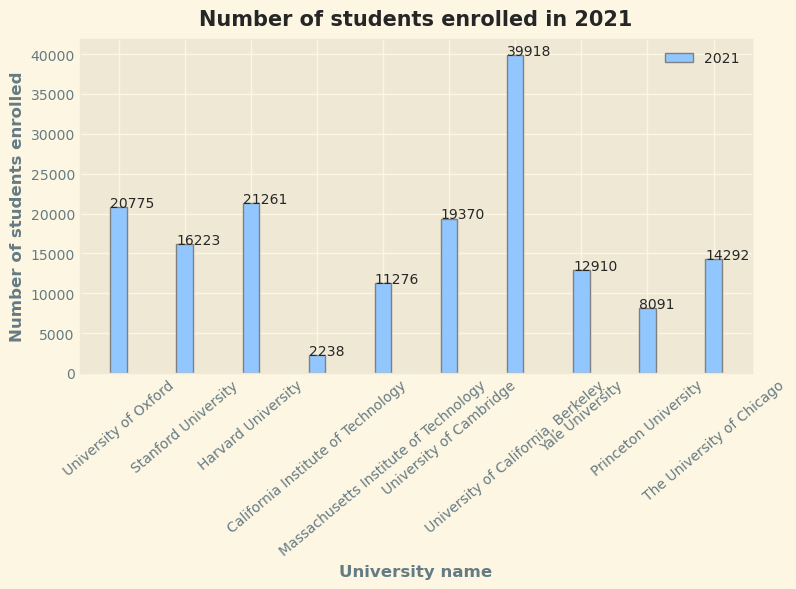

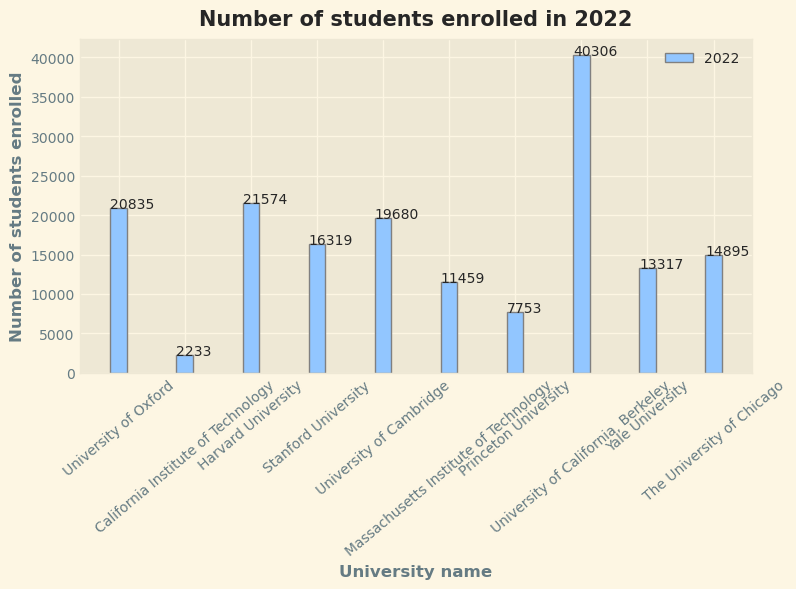

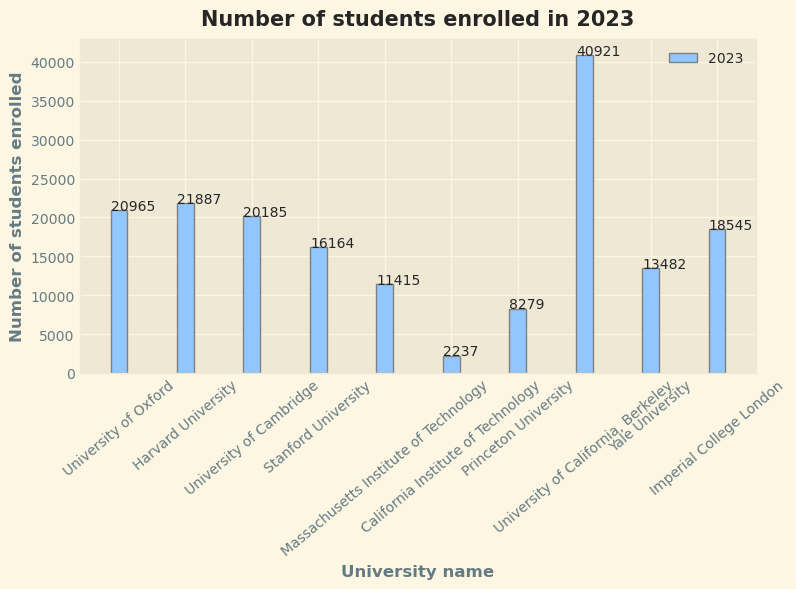

In [54]:
def students_count(df, year):
    """ A function to get sub-datafram of students count of the of Universities.
    
    args:
    df = input dataframe
    year = year of the analysis
    
    returns:
    sub-dataframe
    """
    studentdf = df[['university_name','num_students']][:10]
    studentdf["year"] = year
    studentdf['num_students'] = studentdf['num_students'].str.replace(',','').astype("int64")
    return studentdf

student19 = students_count(df[df['year']==2019], 2019)
student20 = students_count(df[df['year']==2020], 2020)
student21 = students_count(df[df['year']==2021], 2021)
student22 = students_count(df[df['year']==2022], 2022)
student23 = students_count(df[df['year']==2023], 2023)

# plot the figure
def students_plot(df, year):
    """ A function to plot the students count by top10 universities.
    
    args:
    df = input dataframe
    year = year of the analysis
    
    returns:
    matplotlib pyplot chart
    """
    fig, ax = plt.subplots(figsize=(8,6))
    ax.bar(x=df['university_name'], height=df['num_students'], width=0.25, edgecolor='grey', label=year)
    ax.set_xlabel('University name', fontweight ='bold', fontsize = 12)
    ax.set_ylabel('Number of students enrolled', fontweight ='bold', fontsize = 12)
    ax.set_xticks(ticks=df['university_name'])
    ax.set_xticklabels(labels=df['university_name'], rotation=40)
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", (p.get_x(),p.get_height()+10))
    ax.legend()
    ax.set_title(f"Number of students enrolled in {year}",fontweight ='bold', fontsize = 15)
    plt.show()
    
students_plot(student19, 2019)
students_plot(student20, 2020)
students_plot(student21, 2021)
students_plot(student22, 2022)
students_plot(student23, 2023)